In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
csv_path = '/Users/mpillodi/documents/GitHub/wind-data-analysis/csvfolder/2013_03_08_0000.csv'

In [3]:
df = pd.read_csv(csv_path)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 44 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    144 non-null    object 
 1   time    144 non-null    object 
 2   period  144 non-null    int64  
 3   s1a     144 non-null    float64
 4   s1x     144 non-null    float64
 5   s1i     144 non-null    float64
 6   s1s     144 non-null    float64
 7   s2a     144 non-null    float64
 8   s2x     144 non-null    float64
 9   s2i     144 non-null    float64
 10  s2s     144 non-null    float64
 11  s3a     144 non-null    float64
 12  s3x     144 non-null    float64
 13  s3i     144 non-null    float64
 14  s3s     144 non-null    float64
 15  d1a     144 non-null    int64  
 16  d1s     144 non-null    int64  
 17  d2a     144 non-null    int64  
 18  d2s     144 non-null    int64  
 19  h1a     144 non-null    int64  
 20  h1x     144 non-null    int64  
 21  h1i     144 non-null    int64  
 22  t1

In [4]:
# Convert 'date' and 'time' columns to datetime format and set as index
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)
df.head()

date      time  period       s1a      s1x     s1i  \
datetime                                                                       
2013-03-08 00:10:00  2013-03-08  00:10:00     600  10.14458  11.6042  8.0699   
2013-03-08 00:20:00  2013-03-08  00:20:00     600  10.28228  11.6042  8.3453   
2013-03-08 00:30:00  2013-03-08  00:30:00     600   9.98852  11.2370  8.3453   
2013-03-08 00:40:00  2013-03-08  00:40:00     600   9.44231  10.5944  7.7486   
2013-03-08 00:50:00  2013-03-08  00:50:00     600   8.85020  10.1813  7.0601   

                         s1s       s2a      s2x     s2i  ...  tii  vxa  vxx  \
datetime                                                 ...                  
2013-03-08 00:10:00  0.59670  10.01965  11.5573  7.9771  ...   45  126  126   
2013-03-08 00:20:00  0.57375  10.15276  11.6491  8.2066  ...   45  126  126   
2013-03-08 00:30:00  0.46818   9.84982  11.2360  8.1607  ...   45  126  126   
2013-03-08 00:40:00  0.53703   9.33115  10.8229  7.8853  ...   45  126  126   
2013-03-08 00:50:00  0.49572   8.69773   9.9508  6.5083  ...   45  126  126   

                     vxi  bla  blx  bli  bra  brx  bri  
datetime                                                
2013-03-08 00:10:00  126   83   83   83   83   83   83  
2013-03-08 00:20:00  126   83   83   83   83   83   83  
2013-03-08 00:30:00  126   83   83   83   83   83   83  
2013-03-08 00:40:00  126   83   83   83   83   83   83  
2013-03-08 00:50:00  126   83   83   83   83   83   83  

[5 rows x 44 columns]


Analysis for column: s1a
Descriptive Statistics:
count    144.000000
mean       7.035078
std        1.870612
min        3.310070
25%        5.754245
50%        6.839780
75%        8.788235
max       10.461290
Name: s1a, dtype: float64


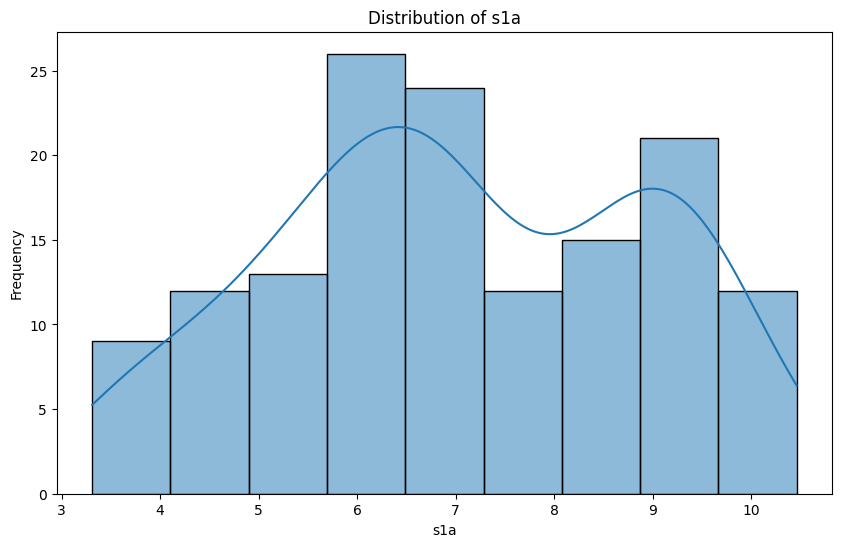


Analysis for column: s1x
Descriptive Statistics:
count    144.000000
mean       8.150863
std        1.850563
min        3.525800
25%        6.830600
50%        8.069900
75%        9.699350
max       12.155000
Name: s1x, dtype: float64


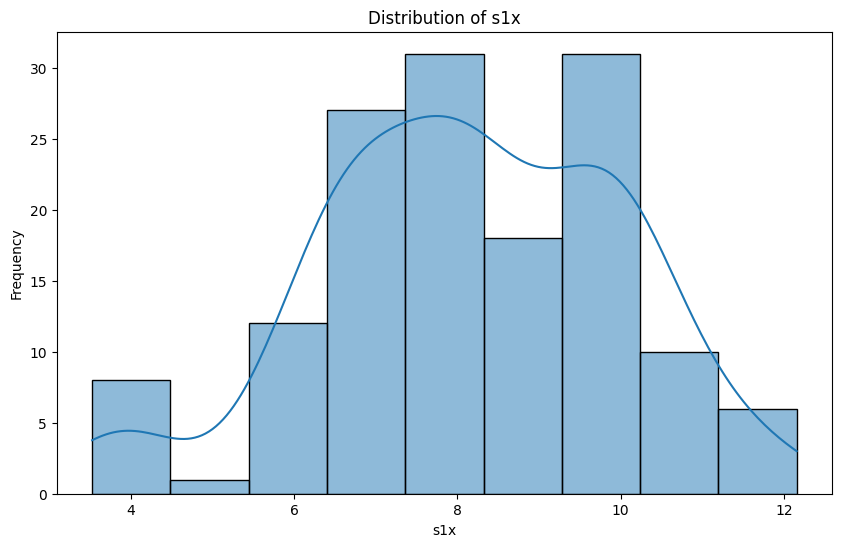


Analysis for column: s1i
Descriptive Statistics:
count    144.000000
mean       5.865425
std        1.932616
min        2.148800
25%        4.248725
50%        5.820800
75%        7.748600
max        9.125600
Name: s1i, dtype: float64


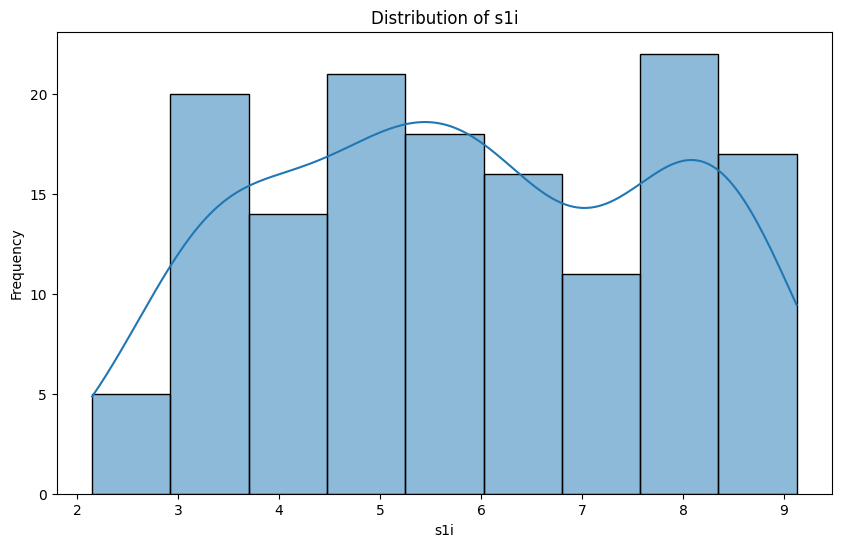


Analysis for column: s1s
Descriptive Statistics:
count    144.000000
mean       0.436656
std        0.227383
min        0.078030
25%        0.274253
50%        0.374085
75%        0.578340
max        1.239300
Name: s1s, dtype: float64


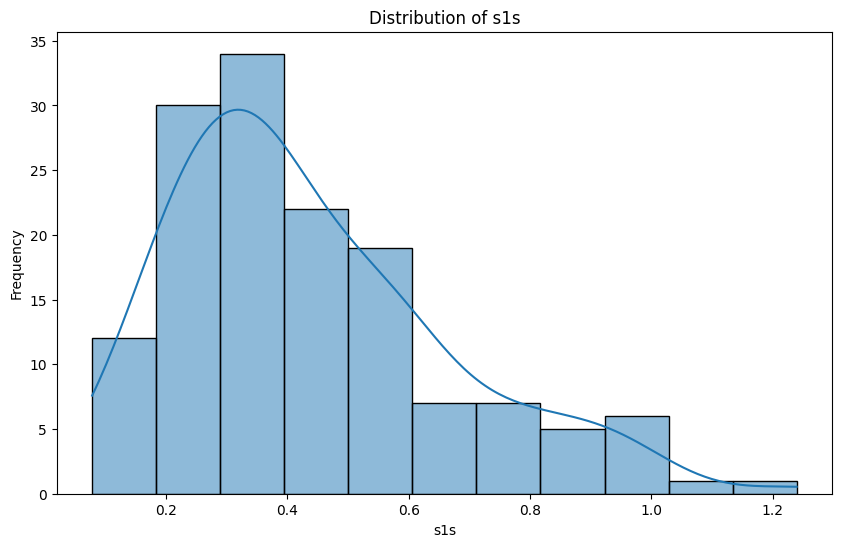


Analysis for column: s2a
Descriptive Statistics:
count    144.000000
mean       6.975588
std        1.846280
min        3.276940
25%        5.734885
50%        6.806650
75%        8.681665
max       10.359310
Name: s2a, dtype: float64


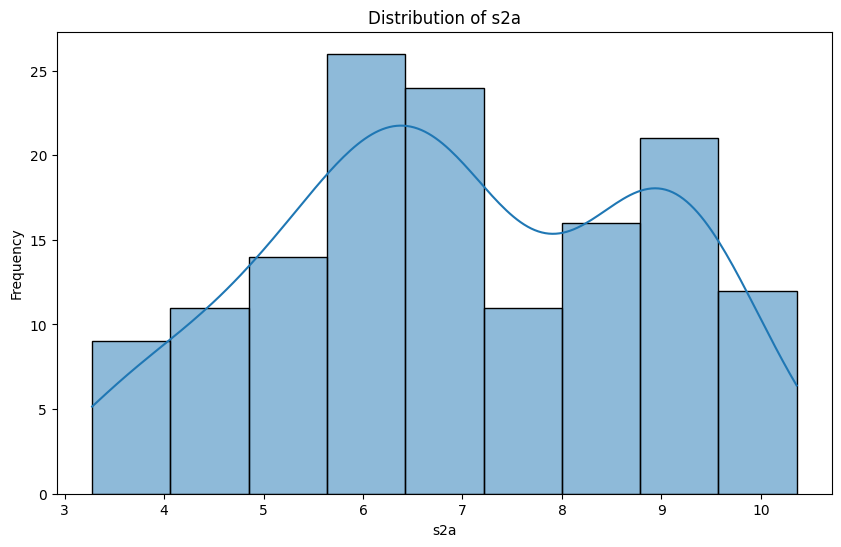


Analysis for column: s2x
Descriptive Statistics:
count    144.000000
mean       8.082606
std        1.836891
min        3.478900
25%        6.783700
50%        8.023000
75%        9.640975
max       12.016300
Name: s2x, dtype: float64


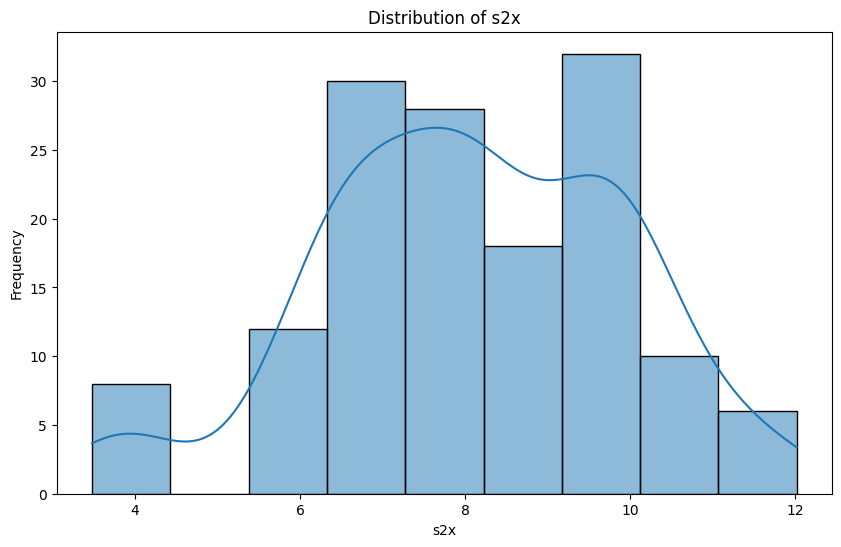


Analysis for column: s2i
Descriptive Statistics:
count    144.000000
mean       5.805456
std        1.902595
min        2.147800
25%        4.213300
50%        5.728000
75%        7.564000
max        9.032800
Name: s2i, dtype: float64


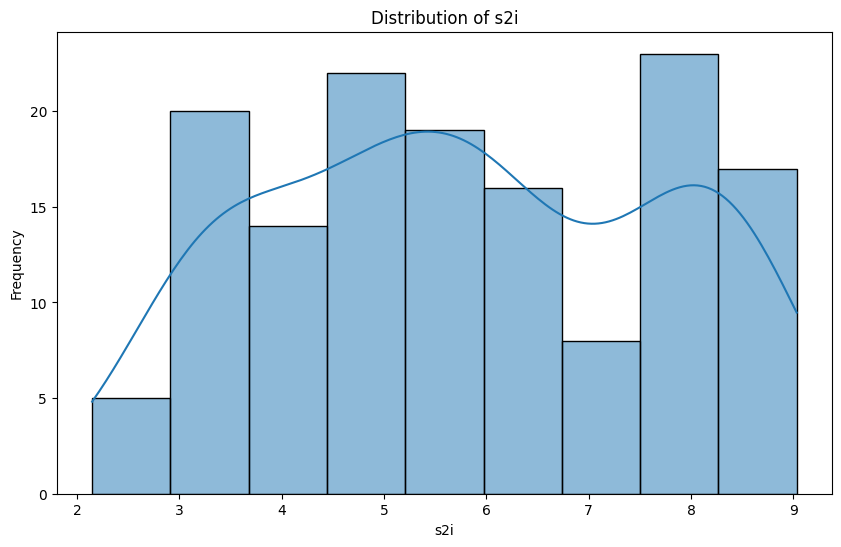


Analysis for column: s2s
Descriptive Statistics:
count    144.000000
mean       0.435540
std        0.223878
min        0.078030
25%        0.270810
50%        0.374085
75%        0.565717
max        1.220940
Name: s2s, dtype: float64


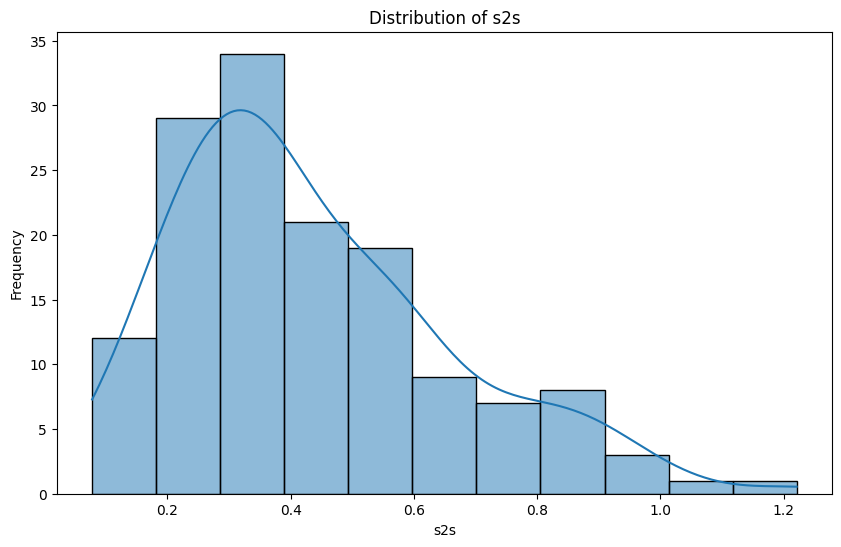


Analysis for column: s3a
Descriptive Statistics:
count    144.000000
mean       6.423095
std        1.583189
min        2.837590
25%        5.195310
50%        6.309950
75%        7.660820
max        9.507090
Name: s3a, dtype: float64


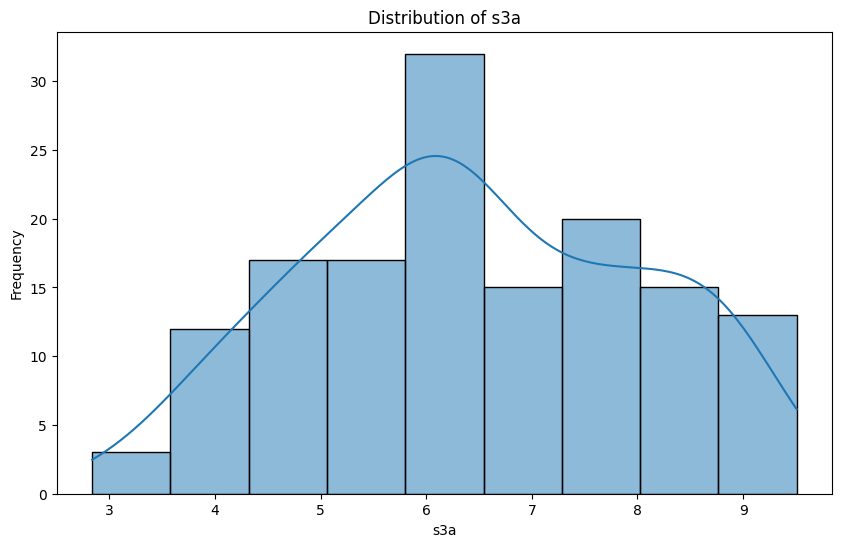


Analysis for column: s3x
Descriptive Statistics:
count    144.000000
mean       7.557740
std        1.569580
min        3.112810
25%        6.507190
50%        7.424590
75%        8.777755
max       11.002450
Name: s3x, dtype: float64


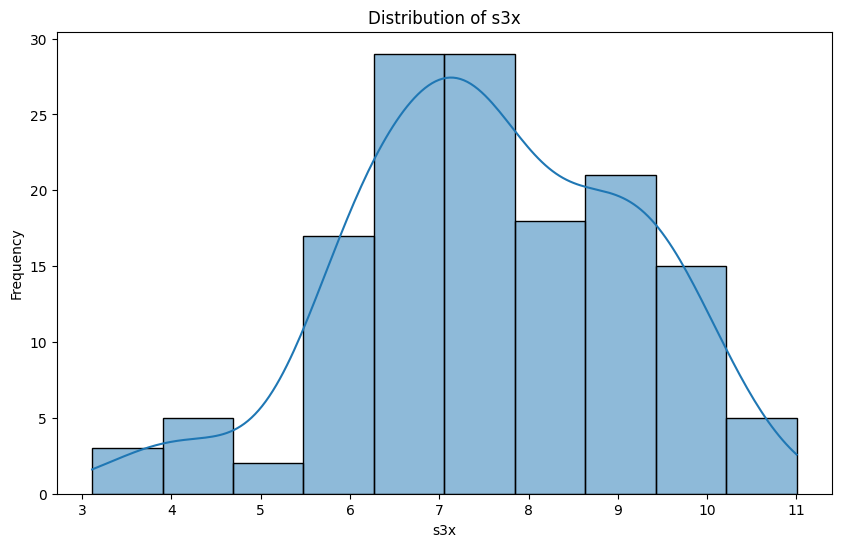


Analysis for column: s3i
Descriptive Statistics:
count    144.000000
mean       5.195754
std        1.643974
min        2.057800
25%        3.846730
50%        5.085220
75%        6.621865
max        8.800690
Name: s3i, dtype: float64


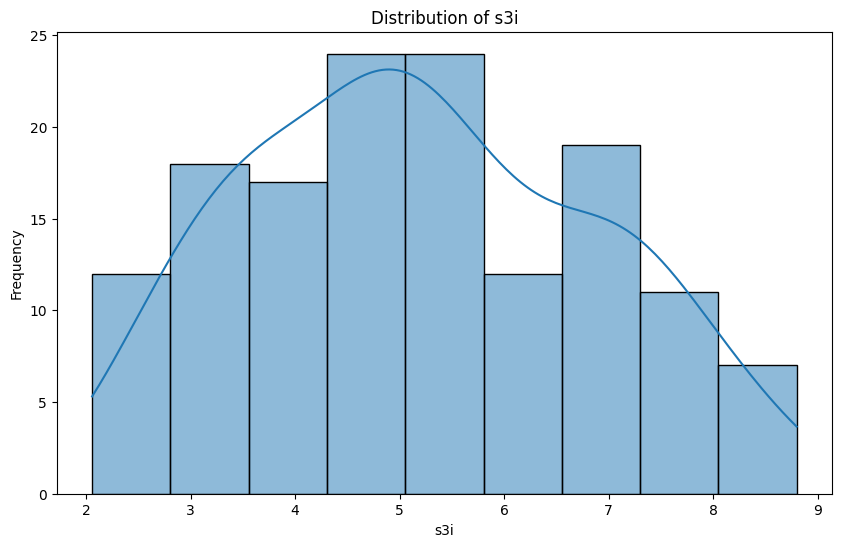


Analysis for column: s3s
Descriptive Statistics:
count    144.000000
mean       0.440479
std        0.182348
min        0.087150
25%        0.315355
50%        0.410535
75%        0.546998
max        0.912810
Name: s3s, dtype: float64


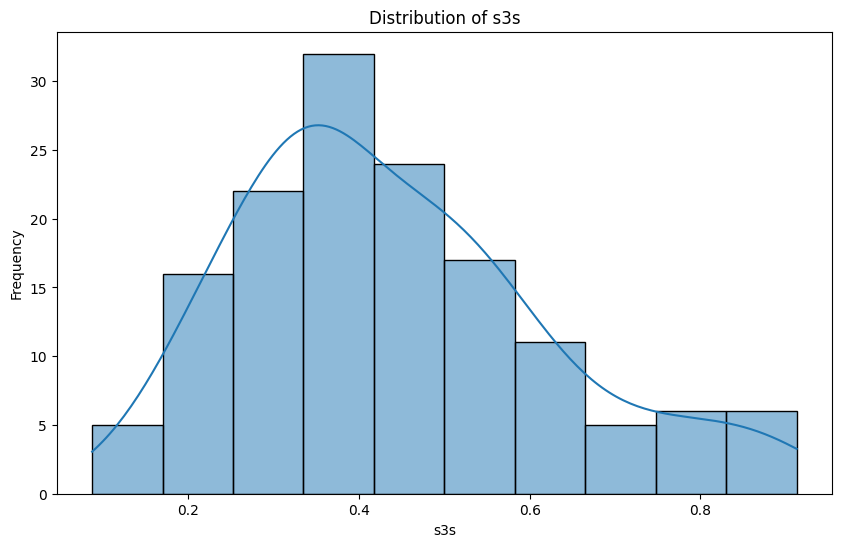


Analysis for column: d1a
Descriptive Statistics:
count    144.000000
mean      66.562500
std      110.707623
min        1.000000
25%       12.000000
50%       28.000000
75%       40.750000
max      360.000000
Name: d1a, dtype: float64


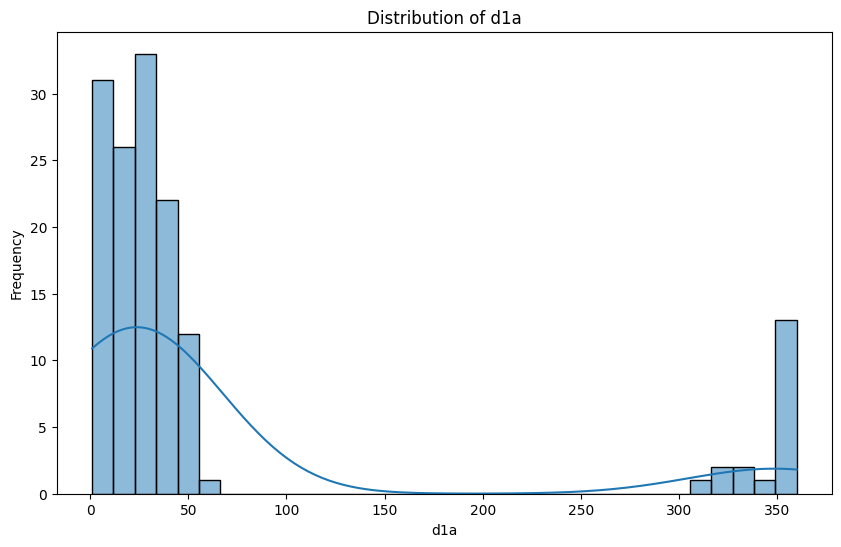


Analysis for column: d1s
Descriptive Statistics:
count    144.000000
mean       4.569444
std        2.546498
min        1.000000
25%        3.000000
50%        4.000000
75%        6.000000
max       16.000000
Name: d1s, dtype: float64


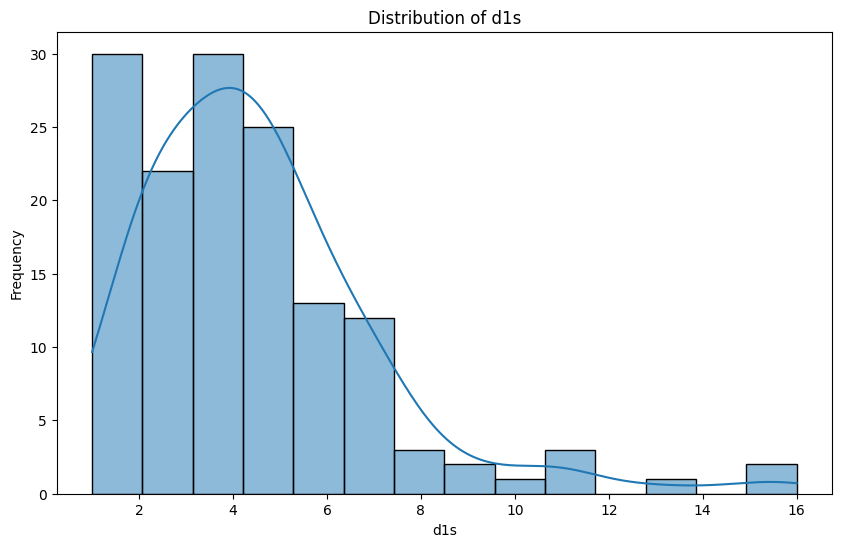


Analysis for column: d2a
Descriptive Statistics:
count    144.000000
mean     130.534722
std      156.527569
min        1.000000
25%       13.750000
50%       24.500000
75%      339.250000
max      360.000000
Name: d2a, dtype: float64


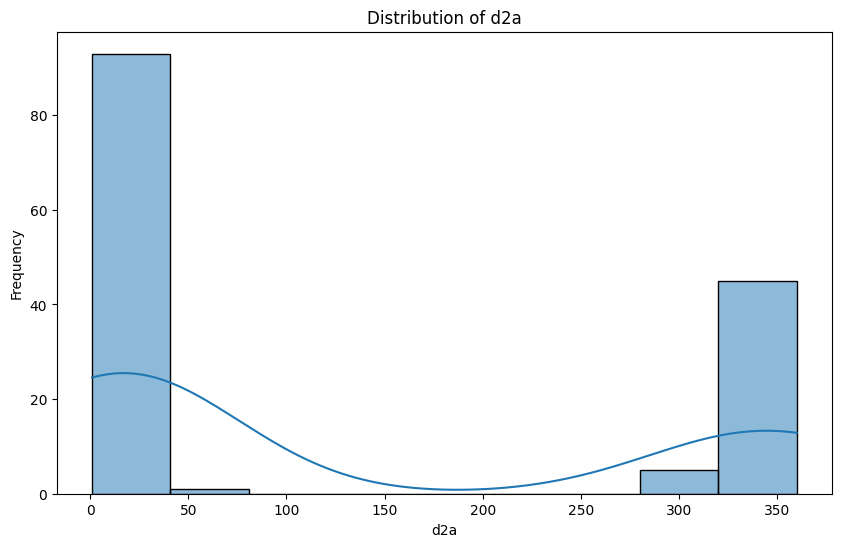


Analysis for column: d2s
Descriptive Statistics:
count    144.000000
mean       5.944444
std        2.574153
min        2.000000
25%        4.000000
50%        6.000000
75%        7.000000
max       15.000000
Name: d2s, dtype: float64


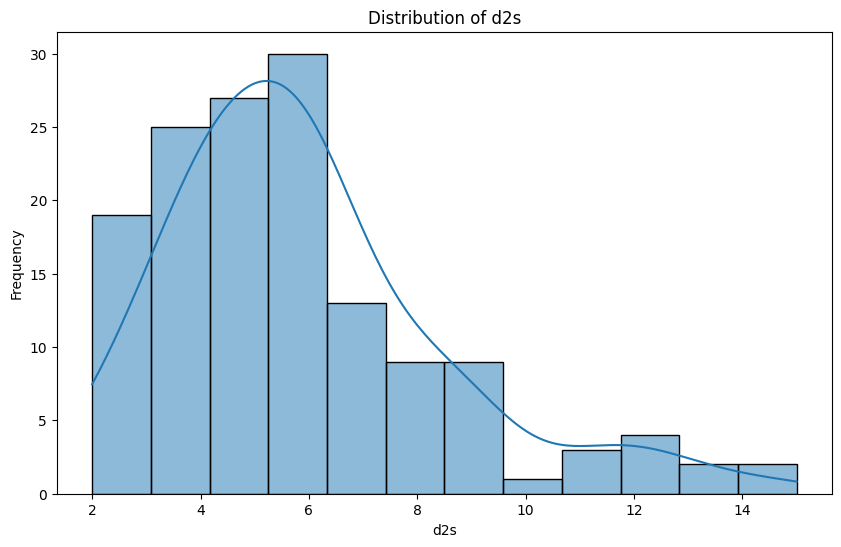


Analysis for column: h1a
Descriptive Statistics:
count    144.000000
mean      82.986111
std        7.340839
min       70.000000
25%       76.000000
50%       82.000000
75%       90.000000
max       98.000000
Name: h1a, dtype: float64


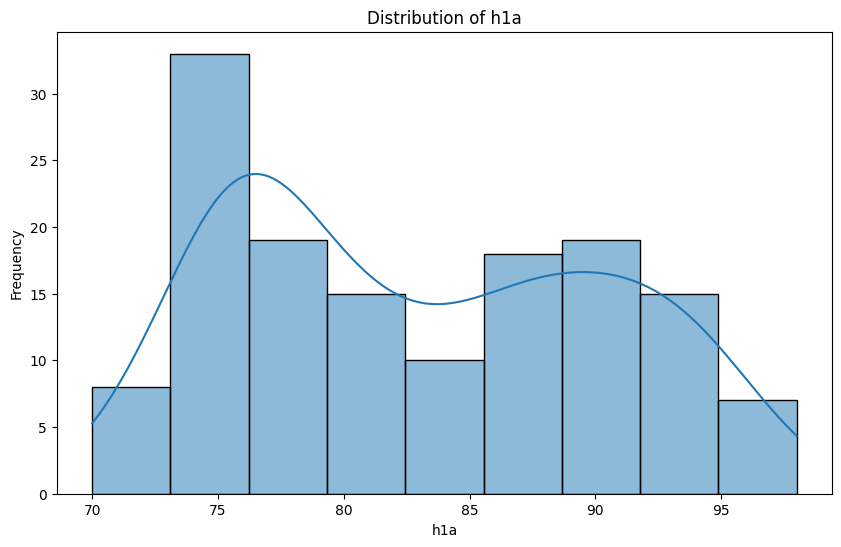


Analysis for column: h1x
Descriptive Statistics:
count    144.000000
mean      84.298611
std        7.540177
min       71.000000
25%       77.000000
50%       84.000000
75%       91.000000
max       99.000000
Name: h1x, dtype: float64


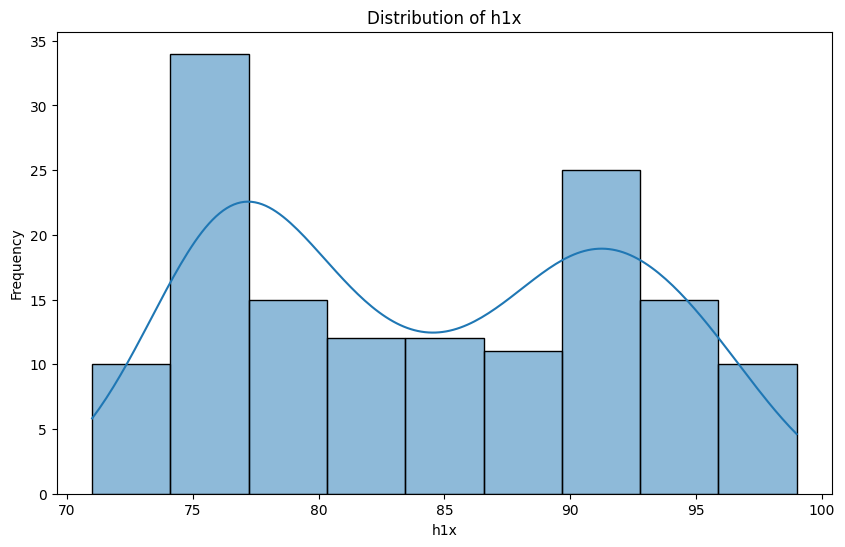


Analysis for column: h1i
Descriptive Statistics:
count    144.000000
mean      81.673611
std        7.140772
min       69.000000
25%       75.000000
50%       80.000000
75%       88.250000
max       97.000000
Name: h1i, dtype: float64


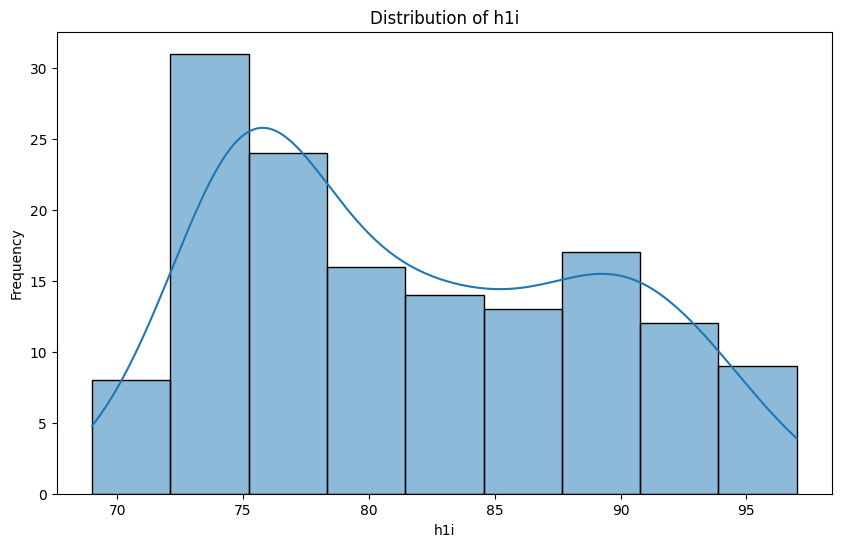


Analysis for column: t1a
Descriptive Statistics:
count    144.000000
mean       7.740972
std        1.077741
min        5.050000
25%        7.050000
50%        7.550000
75%        8.550000
max       10.450000
Name: t1a, dtype: float64


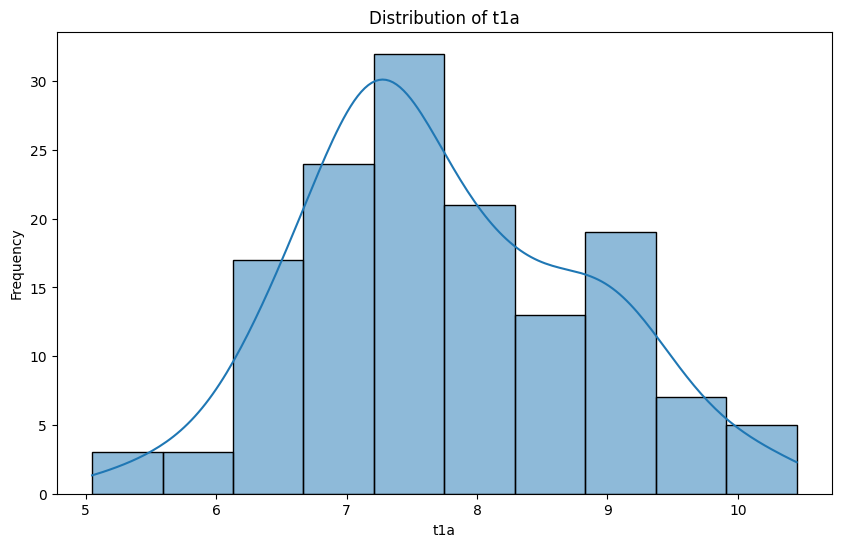


Analysis for column: t1x
Descriptive Statistics:
count    144.000000
mean       7.943056
std        1.079216
min        5.250000
25%        7.250000
50%        7.750000
75%        8.850000
max       10.650000
Name: t1x, dtype: float64


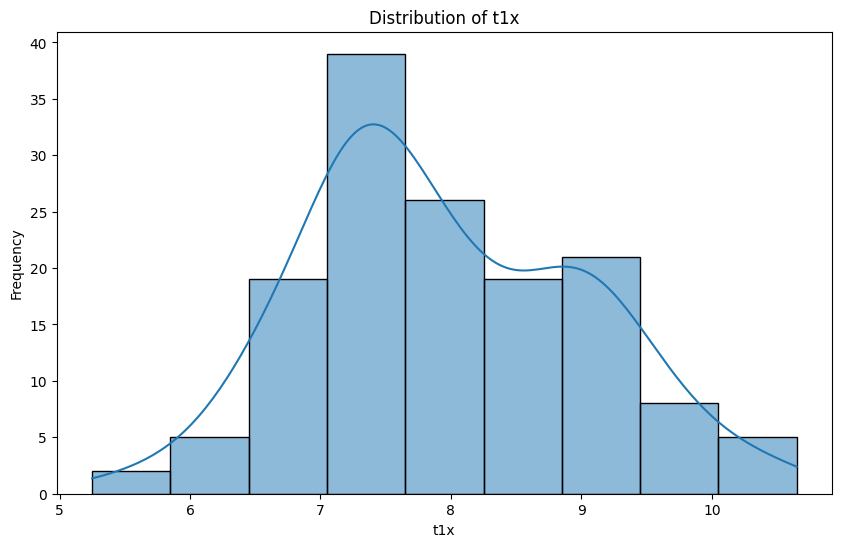


Analysis for column: t1i
Descriptive Statistics:
count    144.000000
mean       7.550000
std        1.075018
min        5.050000
25%        6.850000
50%        7.350000
75%        8.275000
max       10.050000
Name: t1i, dtype: float64


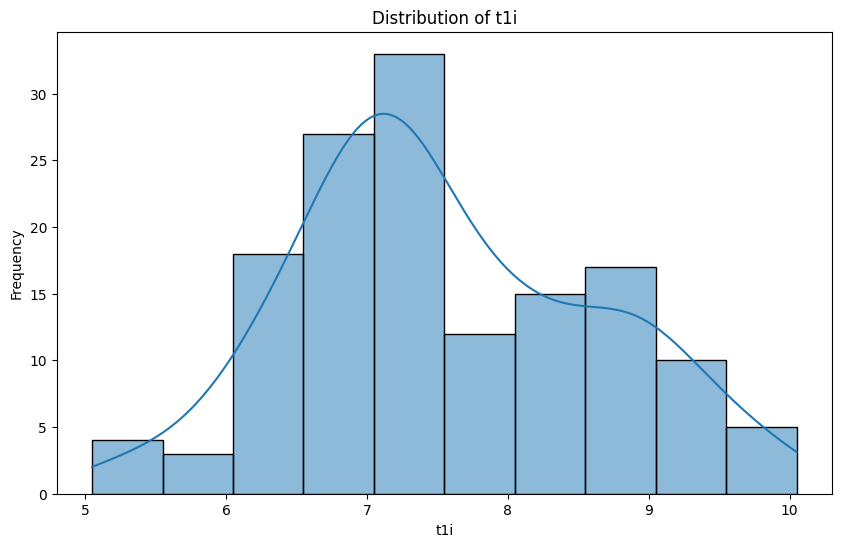


Analysis for column: b1a
Descriptive Statistics:
count     144.000000
mean     1008.750000
std         1.137412
min      1007.000000
25%      1008.000000
50%      1008.000000
75%      1010.000000
max      1010.000000
Name: b1a, dtype: float64


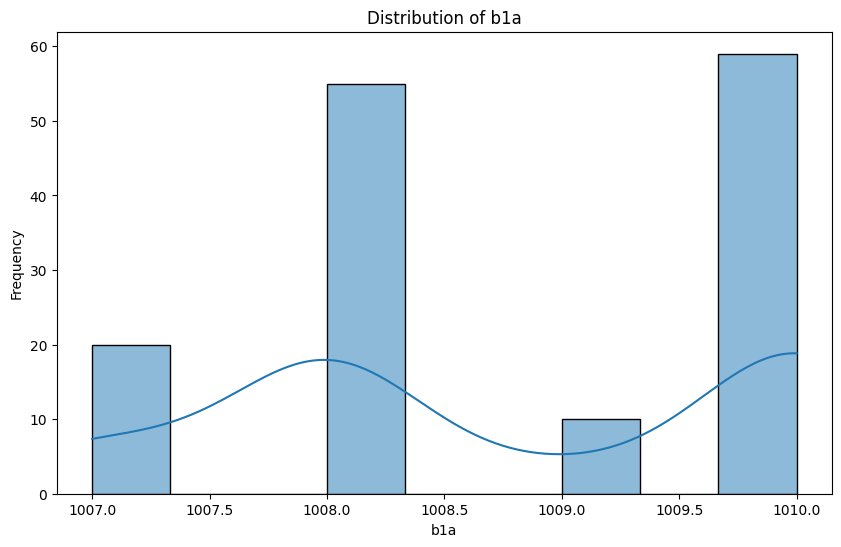


Analysis for column: b1x
Descriptive Statistics:
count     144.000000
mean     1008.875000
std         1.139715
min      1007.000000
25%      1008.000000
50%      1009.000000
75%      1010.000000
max      1011.000000
Name: b1x, dtype: float64


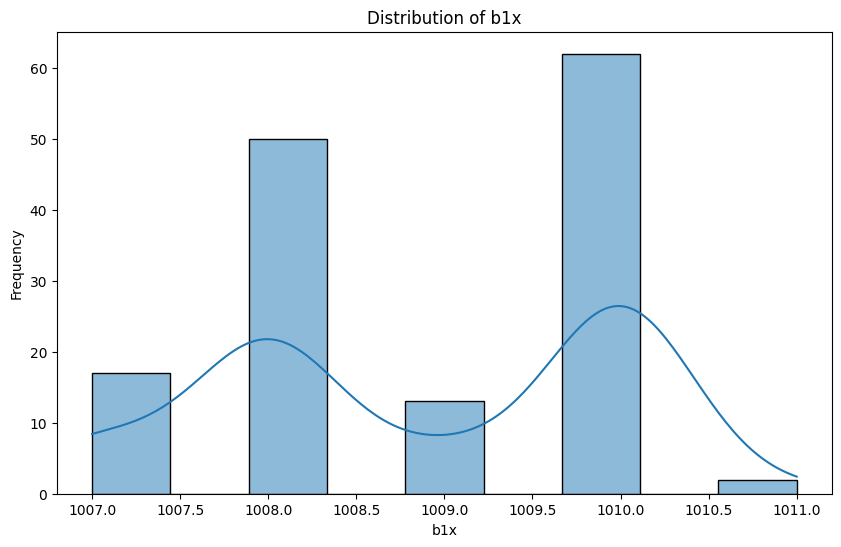


Analysis for column: b1i
Descriptive Statistics:
count     144.000000
mean     1008.326389
std         1.133284
min      1006.000000
25%      1008.000000
50%      1008.000000
75%      1009.000000
max      1010.000000
Name: b1i, dtype: float64


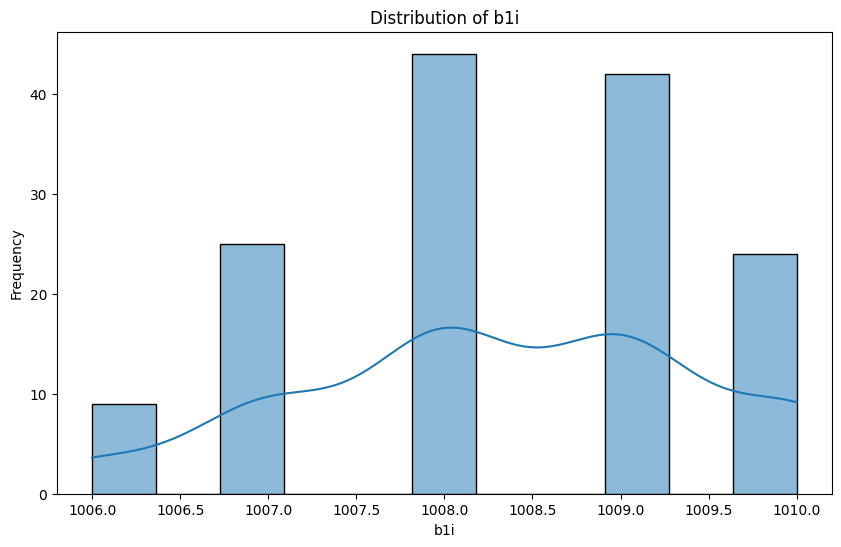


Analysis for column: p1a
Descriptive Statistics:
count    144.000000
mean       5.377211
std        1.036288
min        3.075290
25%        4.557387
50%        5.271500
75%        6.171310
max        7.490640
Name: p1a, dtype: float64


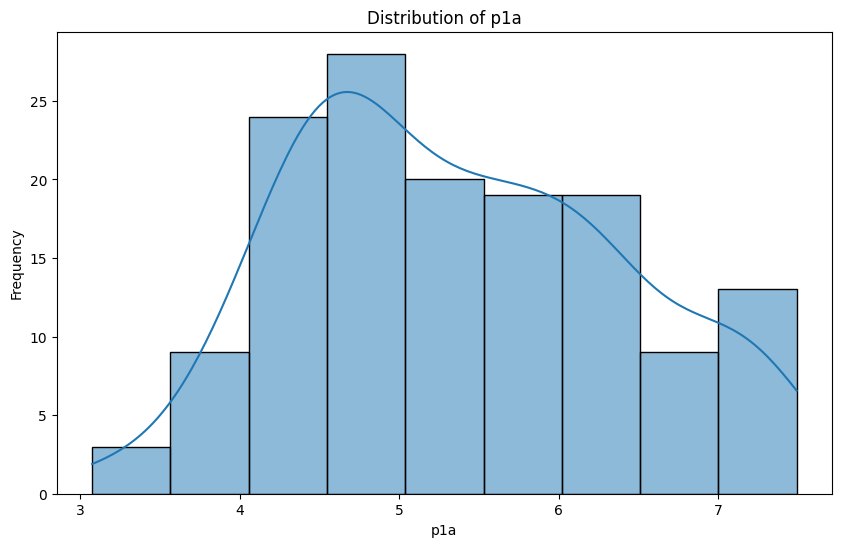


Analysis for column: p1x
Descriptive Statistics:
count    144.000000
mean       6.595737
std        1.109441
min        3.620900
25%        5.718538
50%        6.555300
75%        7.437912
max        8.985350
Name: p1x, dtype: float64


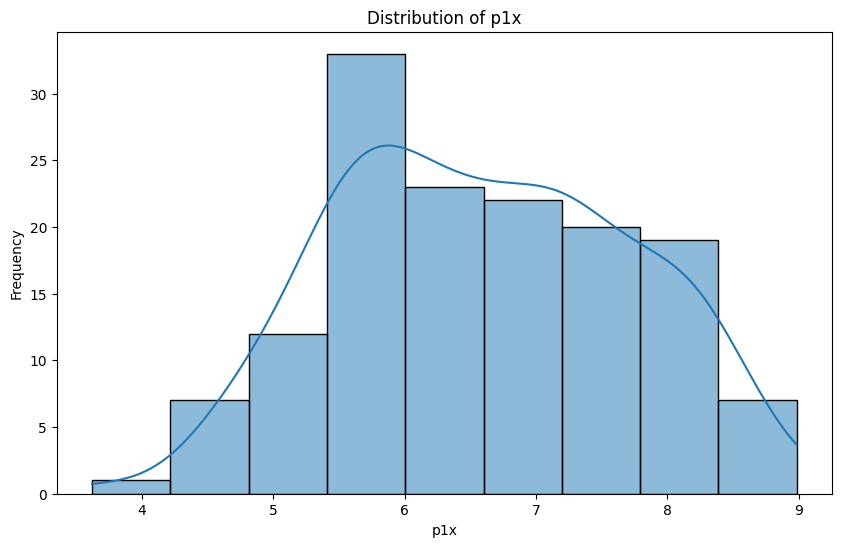


Analysis for column: p1i
Descriptive Statistics:
count    144.000000
mean       4.077808
std        1.038379
min        1.649350
25%        3.426038
50%        3.964775
75%        4.721300
max        6.967950
Name: p1i, dtype: float64


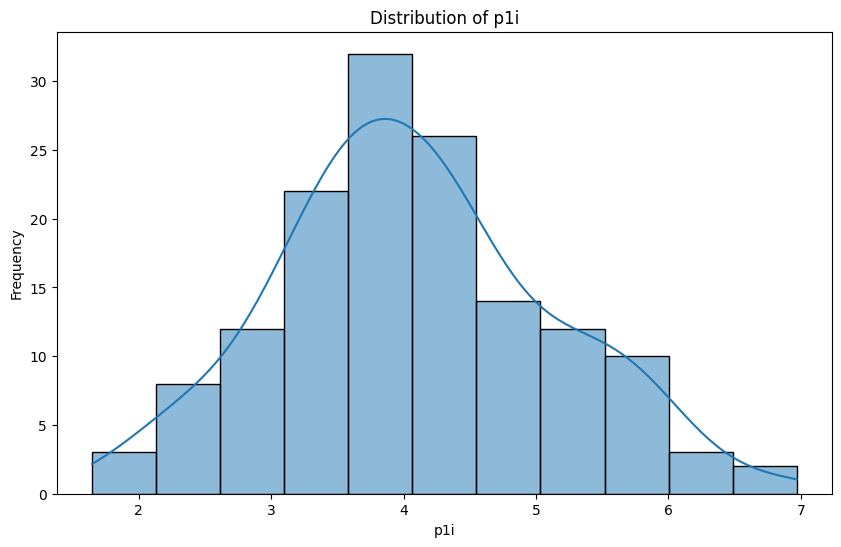


Analysis for column: p1s
Descriptive Statistics:
count    144.000000
mean       0.471079
std        0.168945
min        0.169650
25%        0.366800
50%        0.453920
75%        0.542177
max        0.999530
Name: p1s, dtype: float64


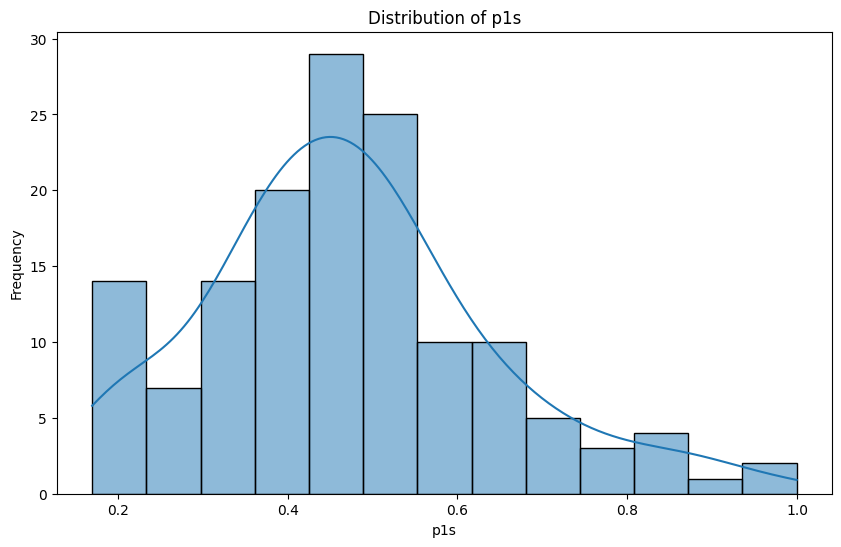


Analysis for column: tia
Descriptive Statistics:
count    144.000000
mean      46.652778
std        1.856078
min       44.000000
25%       45.000000
50%       46.000000
75%       48.000000
max       50.000000
Name: tia, dtype: float64


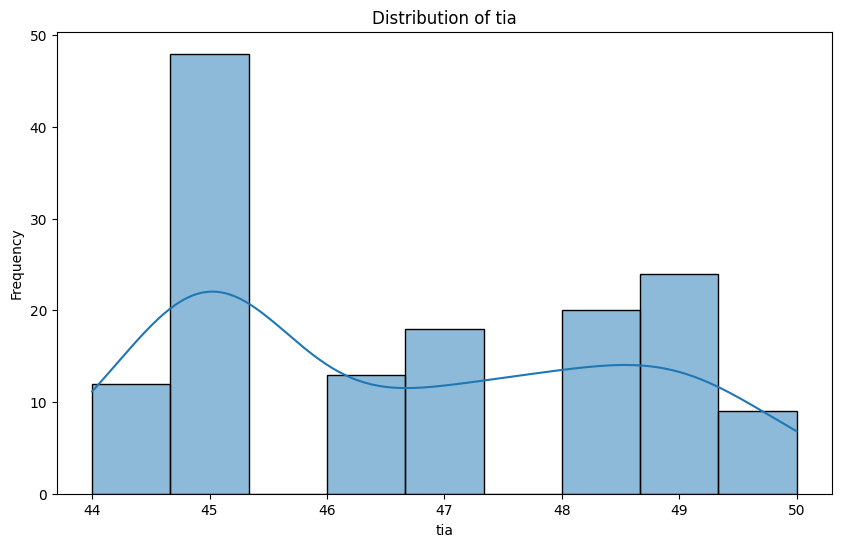


Analysis for column: tix
Descriptive Statistics:
count    144.000000
mean      46.743056
std        1.905995
min       44.000000
25%       45.000000
50%       47.000000
75%       49.000000
max       50.000000
Name: tix, dtype: float64


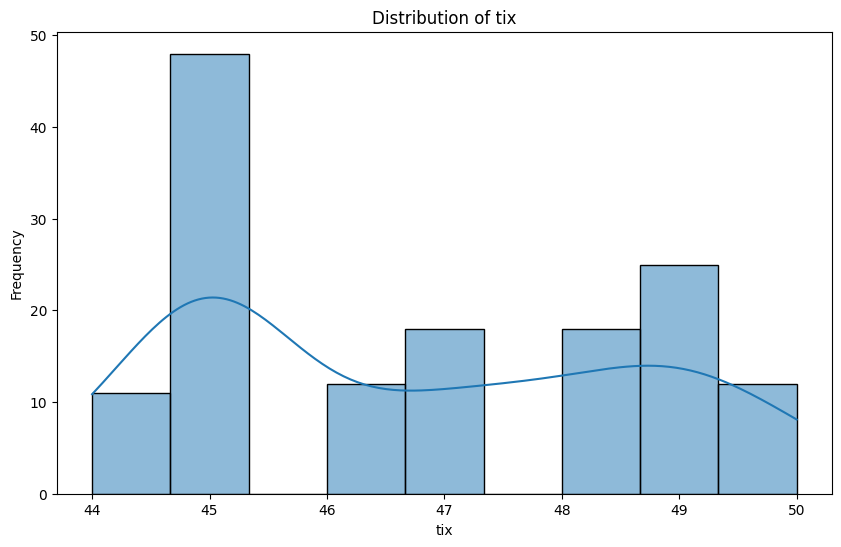


Analysis for column: tii
Descriptive Statistics:
count    144.000000
mean      46.618056
std        1.851087
min       44.000000
25%       45.000000
50%       46.000000
75%       48.000000
max       50.000000
Name: tii, dtype: float64


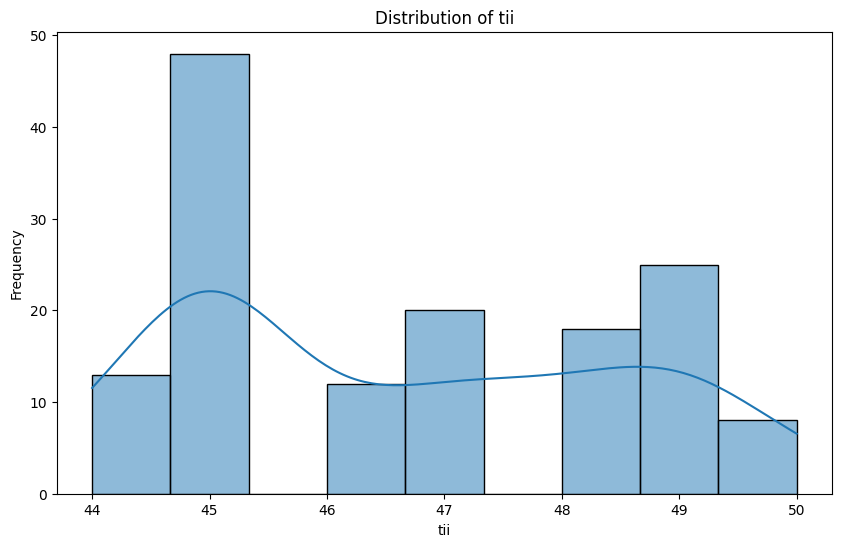


Analysis for column: vxa
Descriptive Statistics:
count    144.000000
mean     129.631944
std        4.907175
min      125.000000
25%      126.000000
50%      127.000000
75%      135.000000
max      138.000000
Name: vxa, dtype: float64


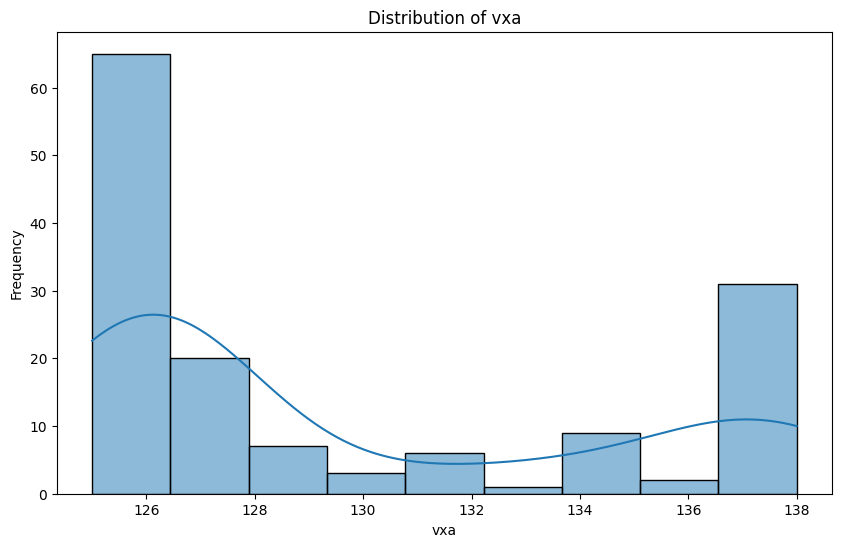


Analysis for column: vxx
Descriptive Statistics:
count    144.000000
mean     130.090278
std        5.263561
min      125.000000
25%      126.000000
50%      127.000000
75%      136.250000
max      141.000000
Name: vxx, dtype: float64


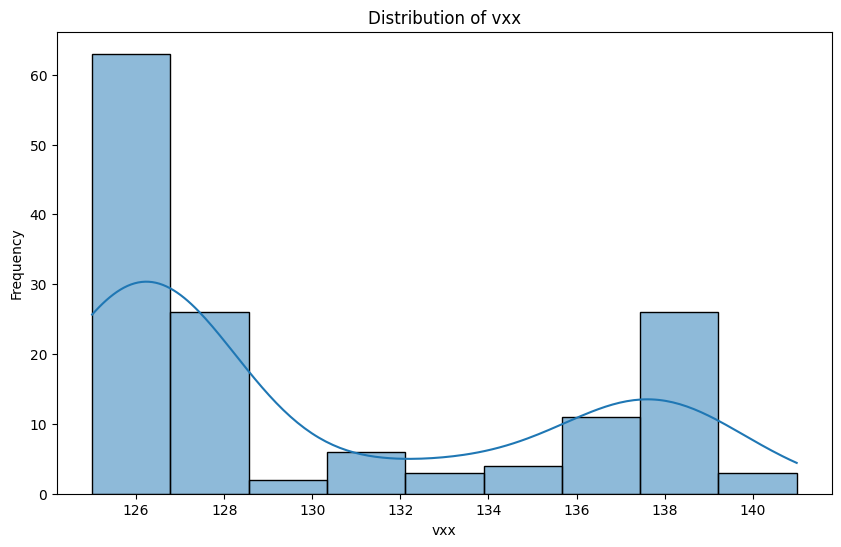


Analysis for column: vxi
Descriptive Statistics:
count    144.000000
mean     129.215278
std        4.648728
min      125.000000
25%      126.000000
50%      127.000000
75%      133.000000
max      138.000000
Name: vxi, dtype: float64


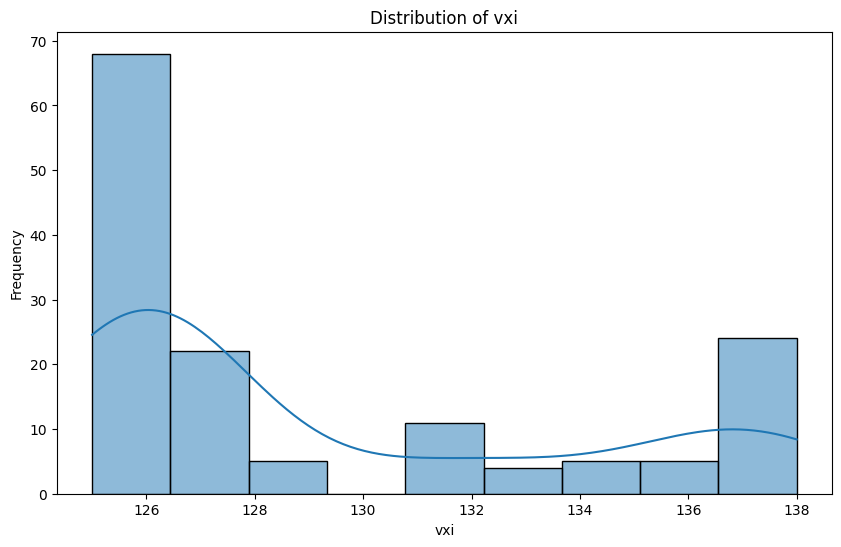


Analysis for column: bla
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bla, dtype: float64


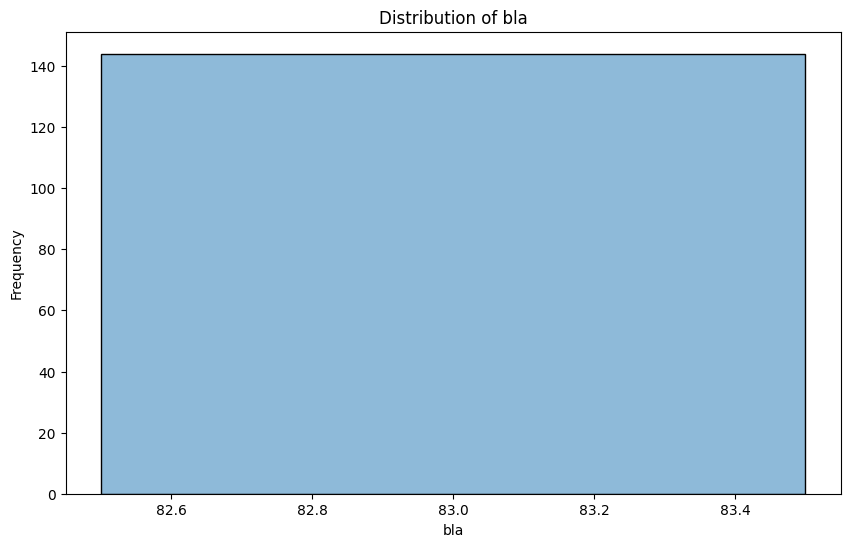


Analysis for column: blx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: blx, dtype: float64


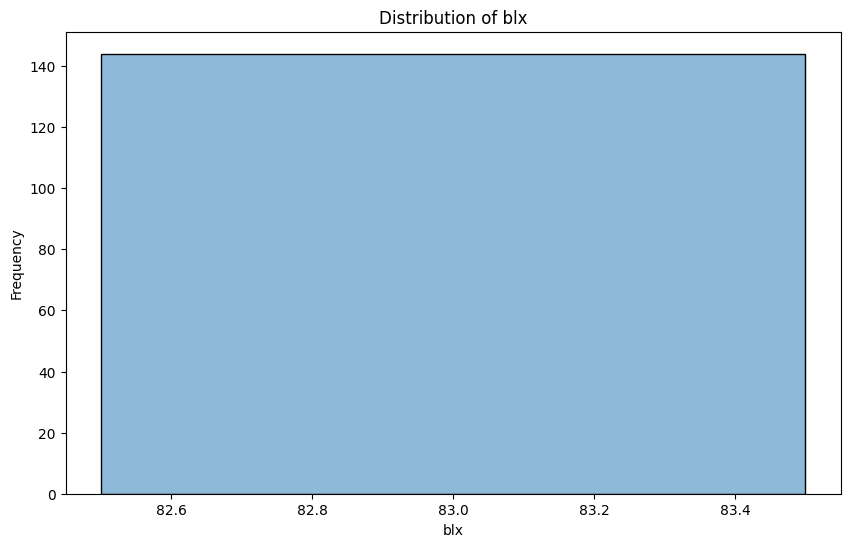


Analysis for column: bli
Descriptive Statistics:
count    144.000000
mean      82.972222
std        0.164909
min       82.000000
25%       83.000000
50%       83.000000
75%       83.000000
max       83.000000
Name: bli, dtype: float64


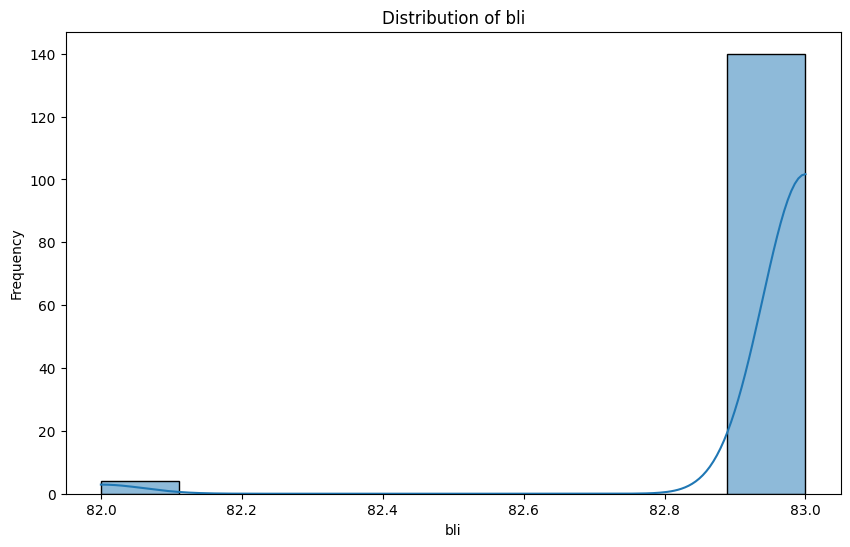


Analysis for column: bra
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bra, dtype: float64


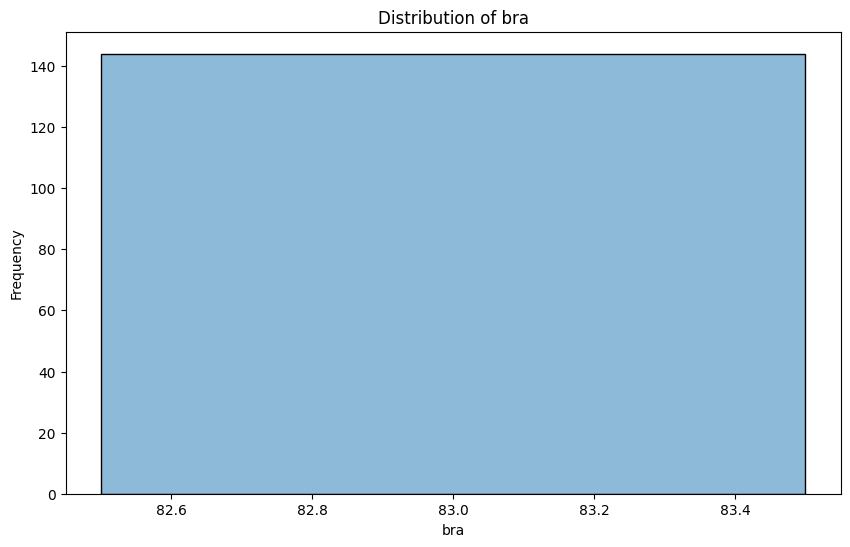


Analysis for column: brx
Descriptive Statistics:
count    144.000000
mean      83.020833
std        0.250000
min       83.000000
25%       83.000000
50%       83.000000
75%       83.000000
max       86.000000
Name: brx, dtype: float64


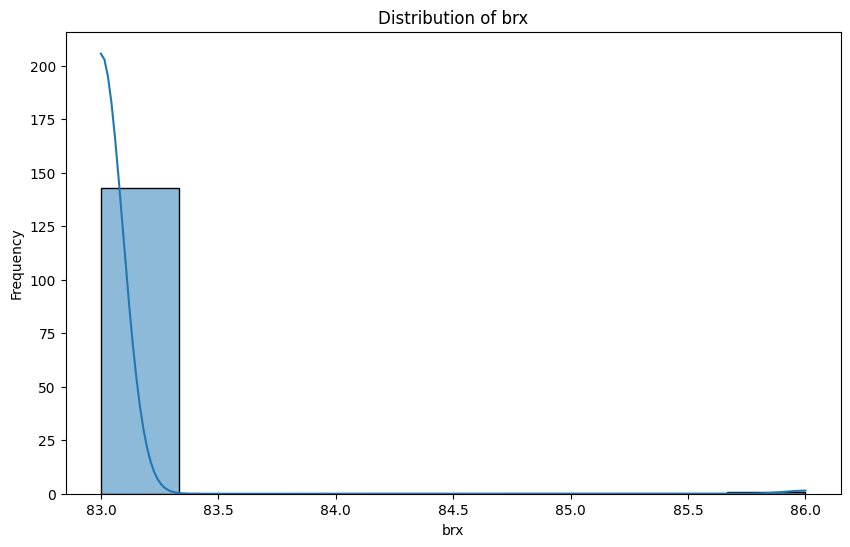


Analysis for column: bri
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bri, dtype: float64


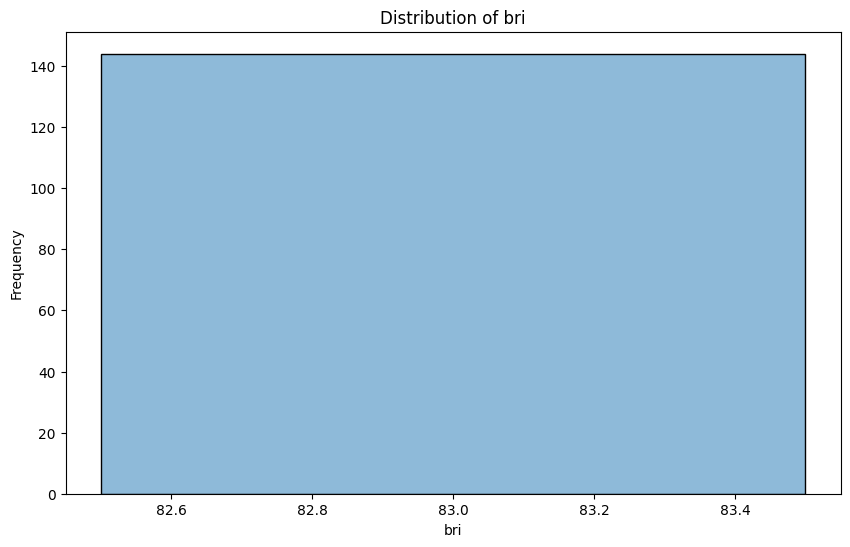

In [5]:
# Perform Statistical data analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        print("\nAnalysis for column:", column)
        
        # Descriptive statistics
        print("Descriptive Statistics:")
        print(df[column].describe())
        
        # Data visualization
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()  

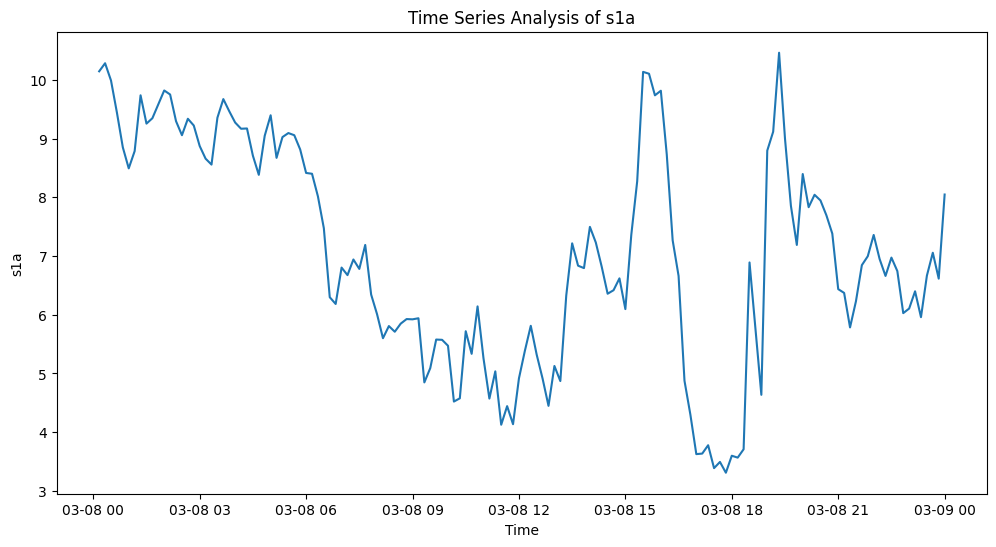

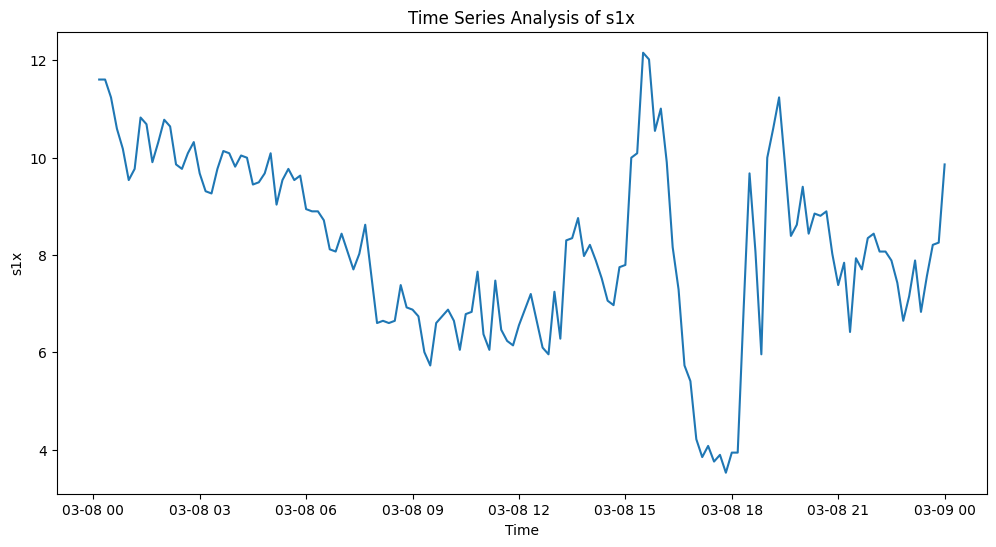

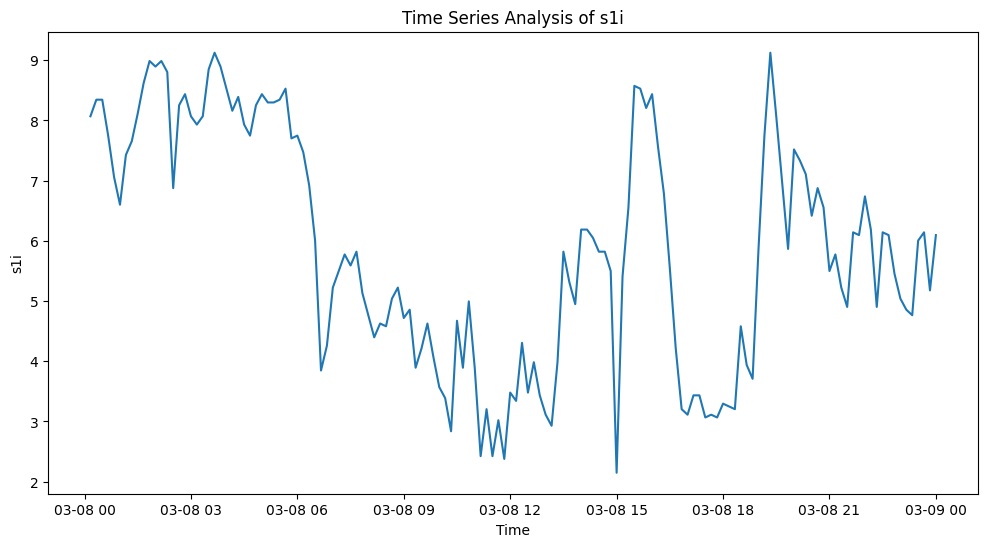

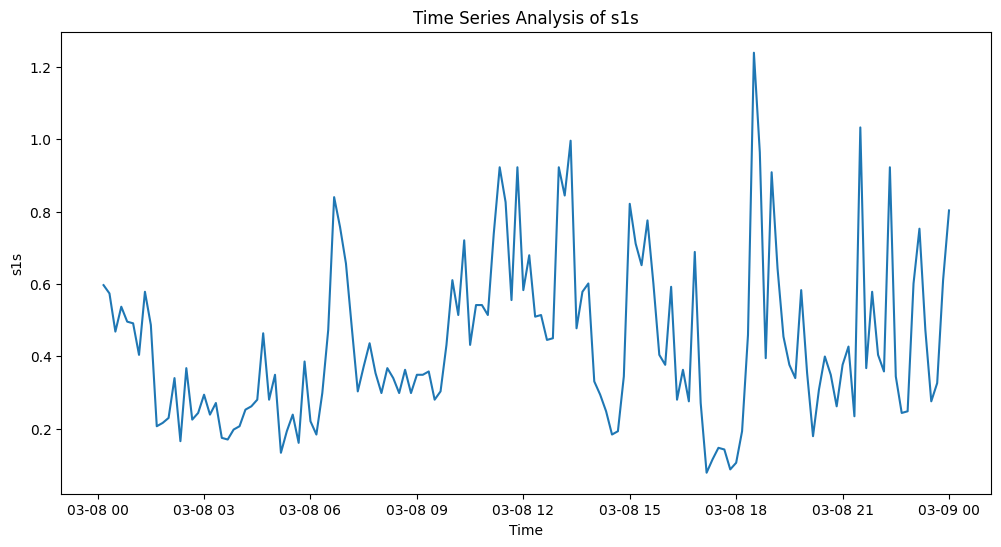

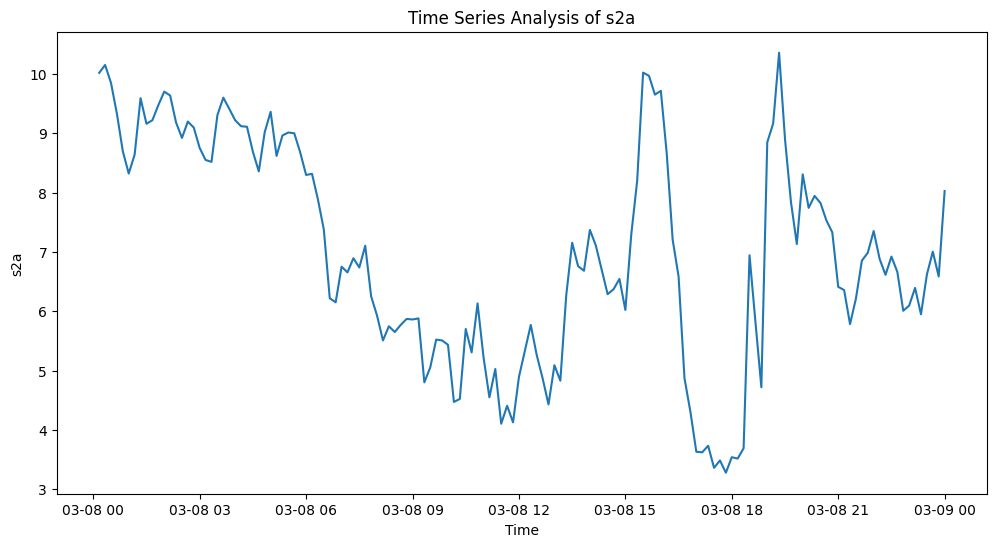

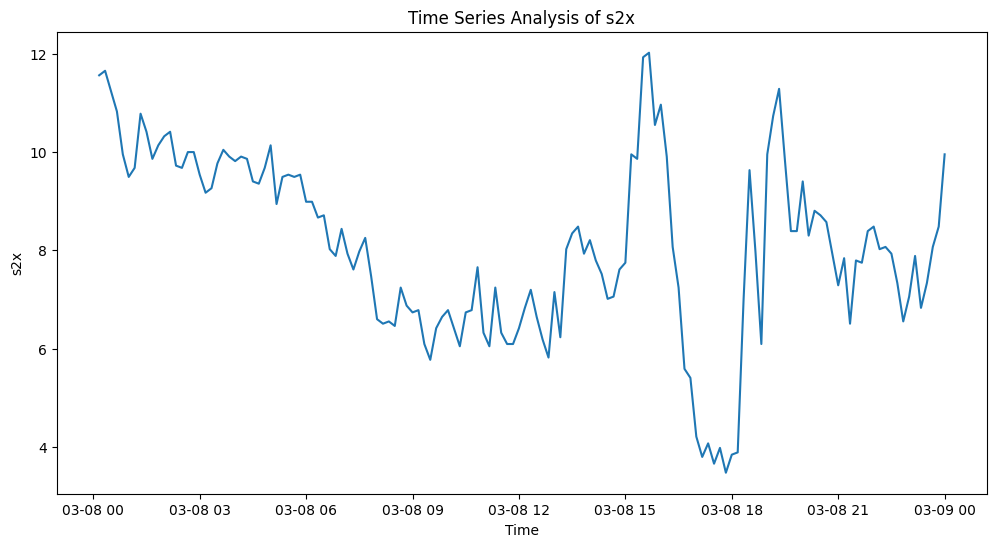

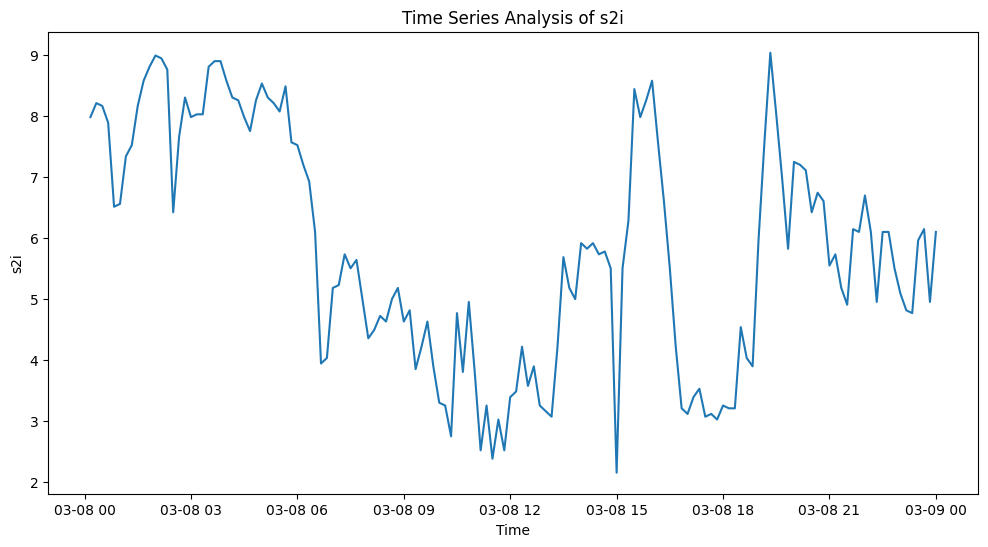

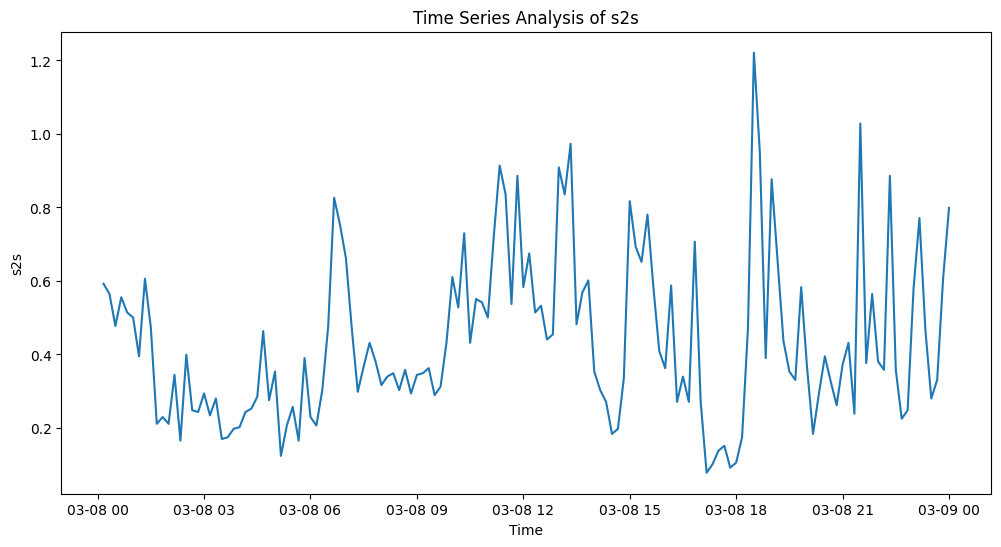

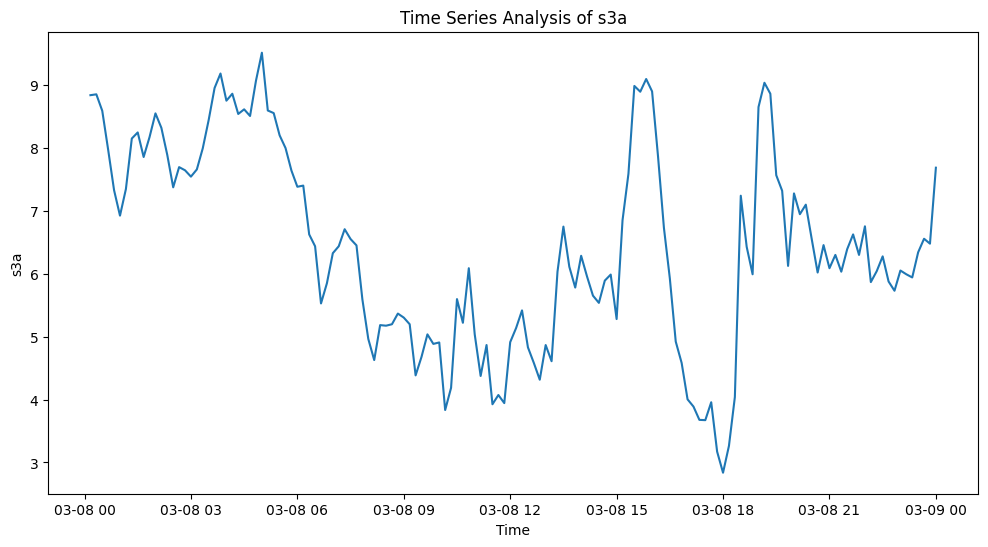

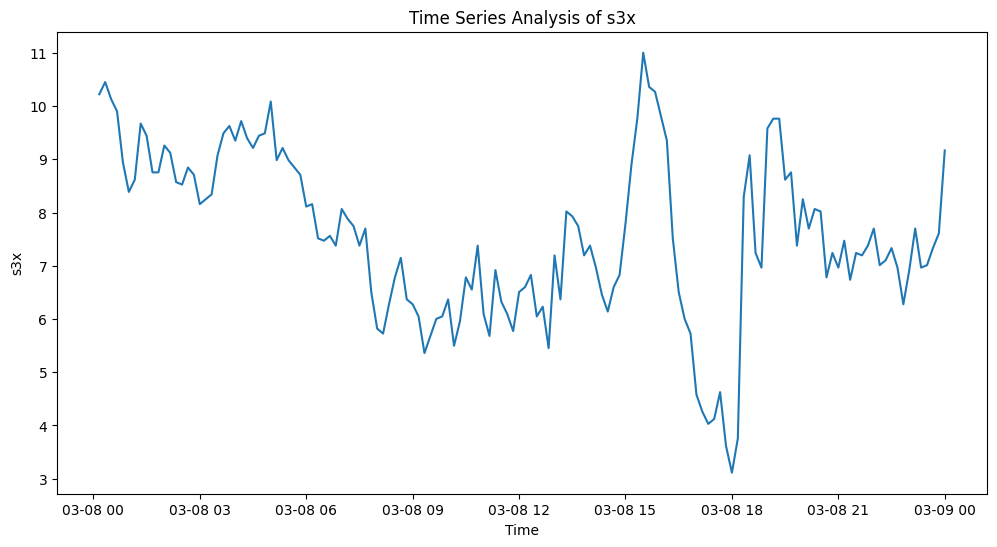

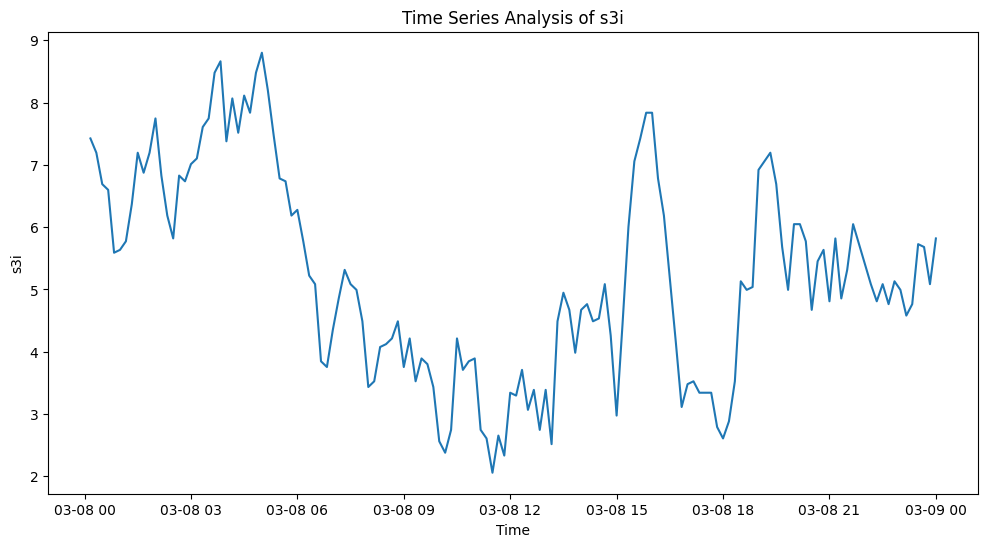

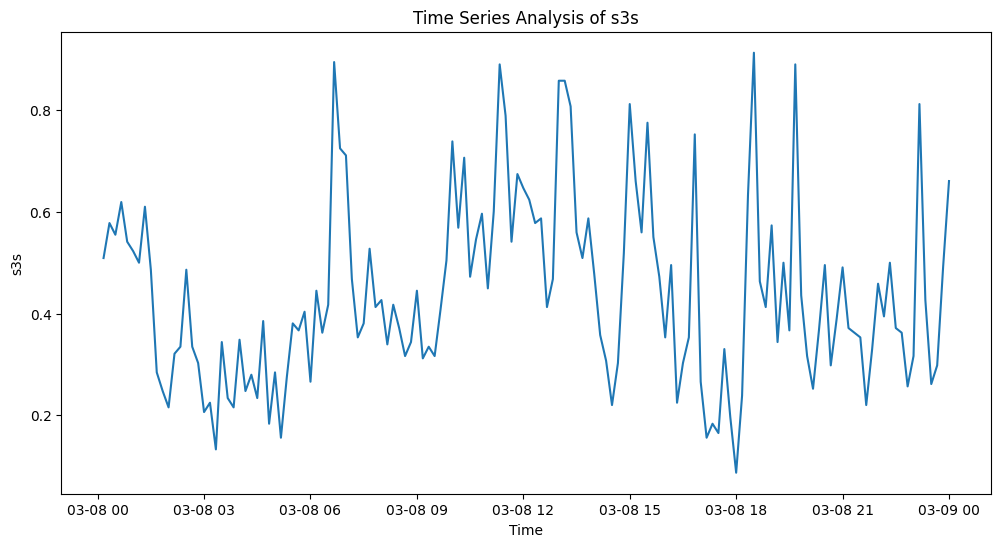

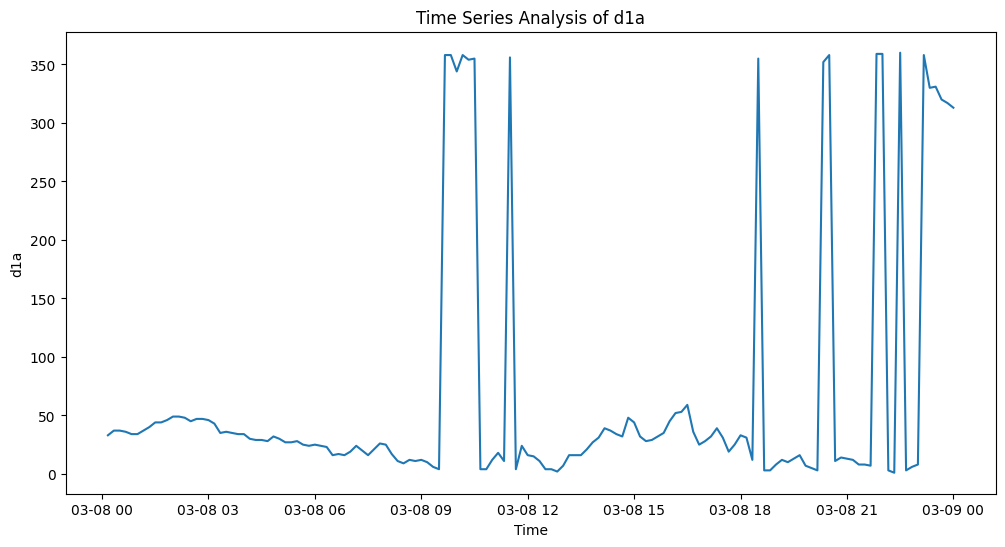

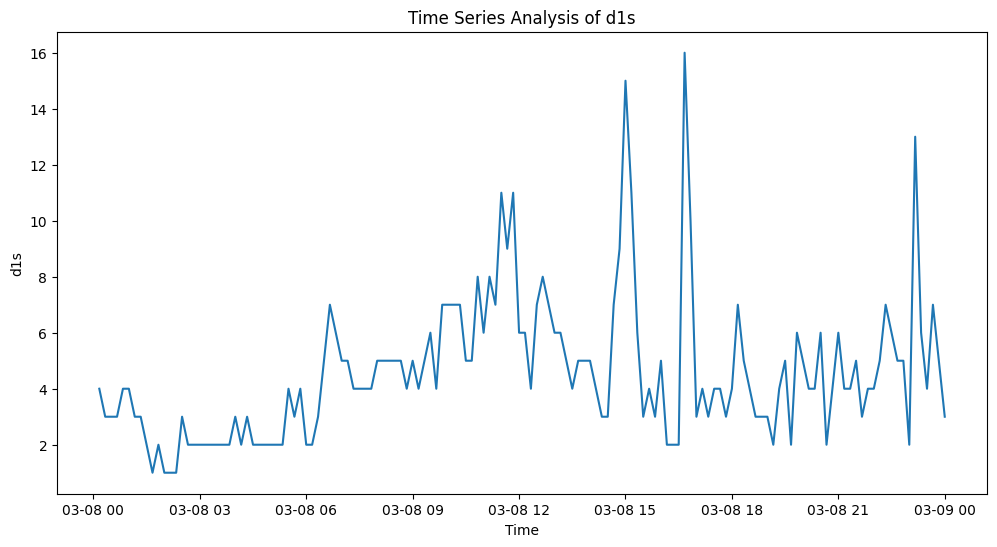

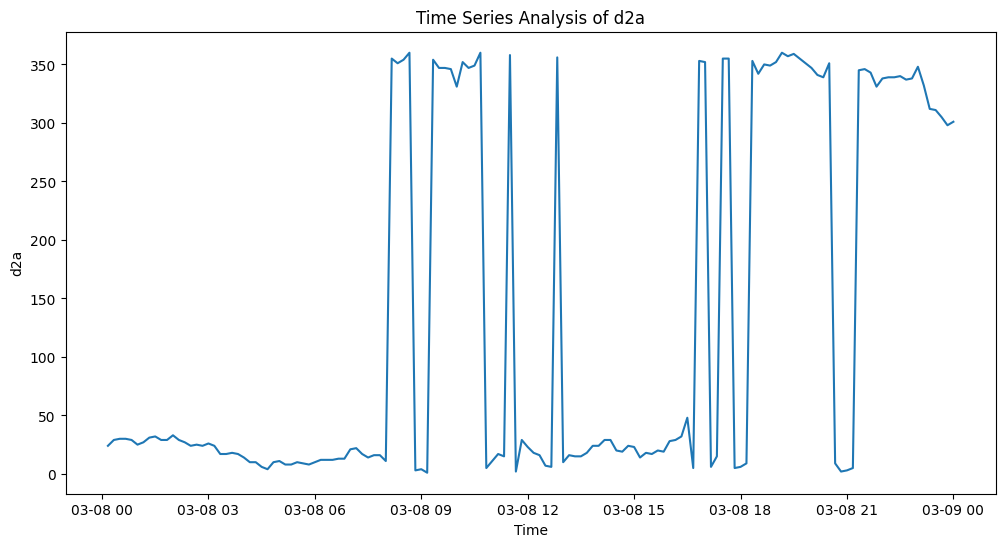

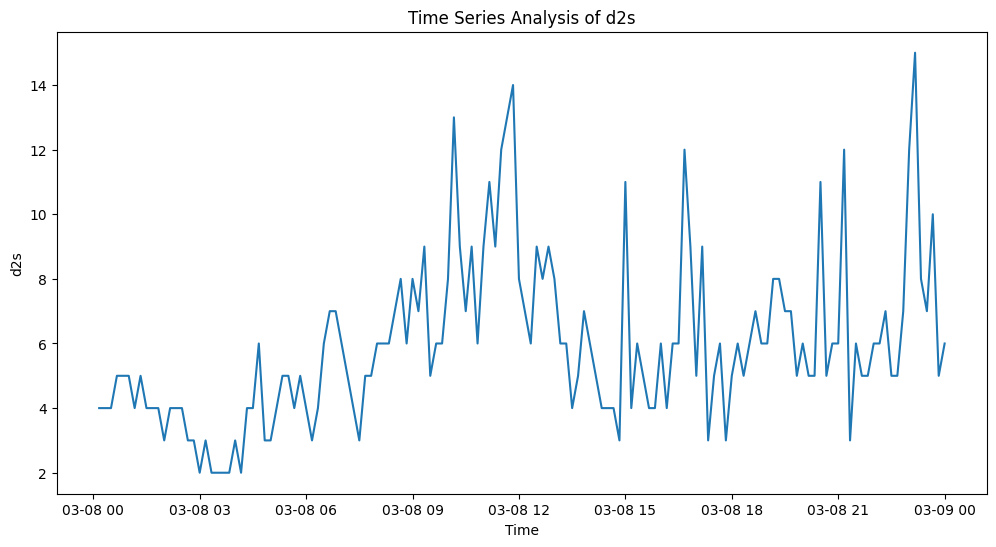

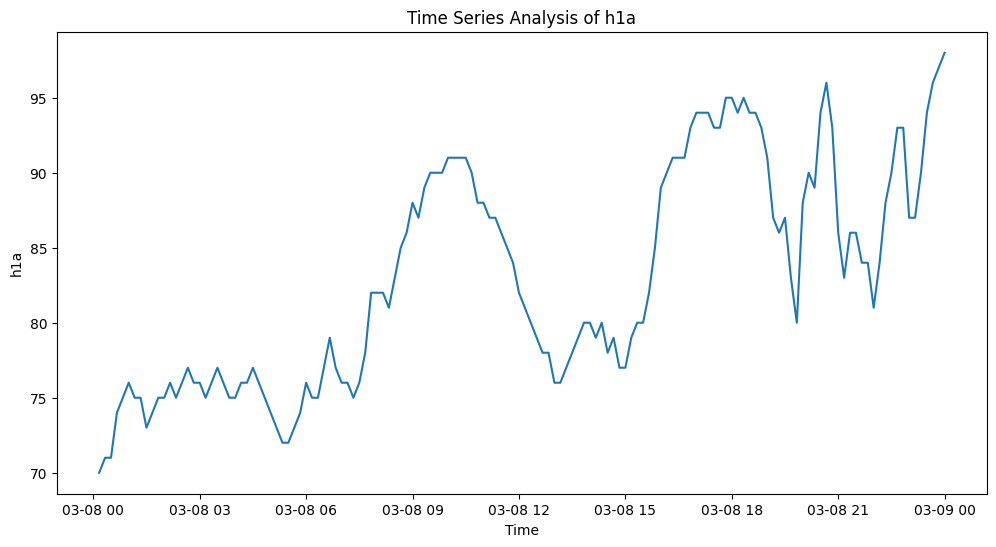

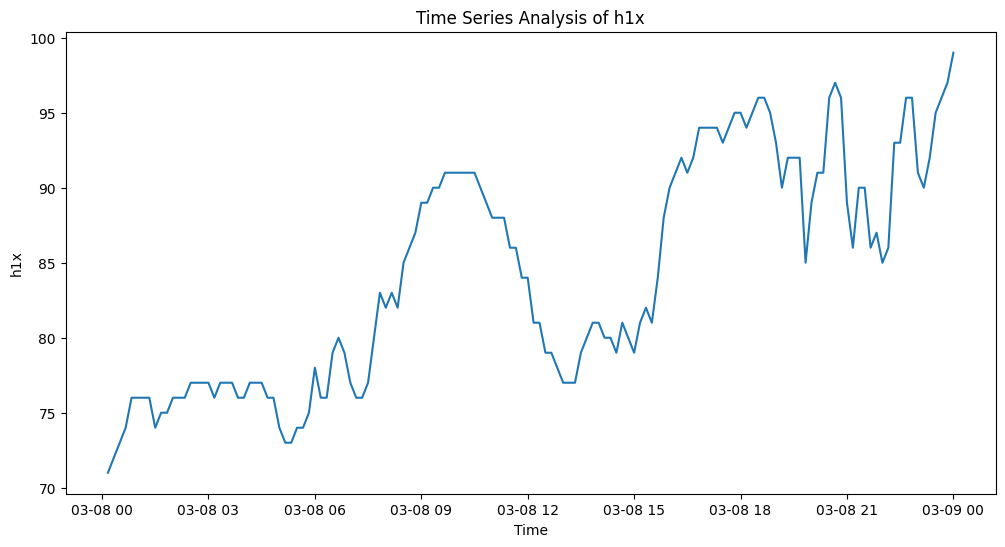

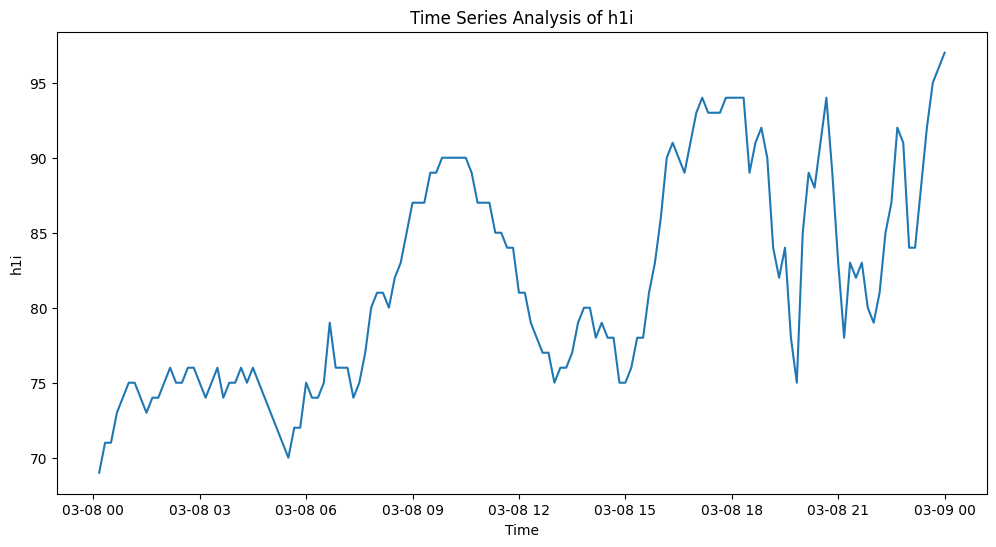

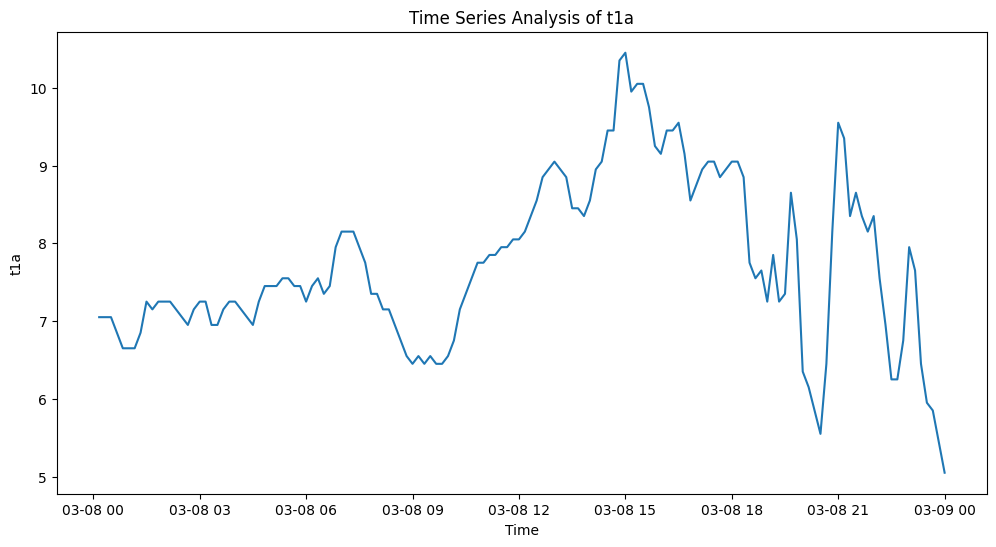

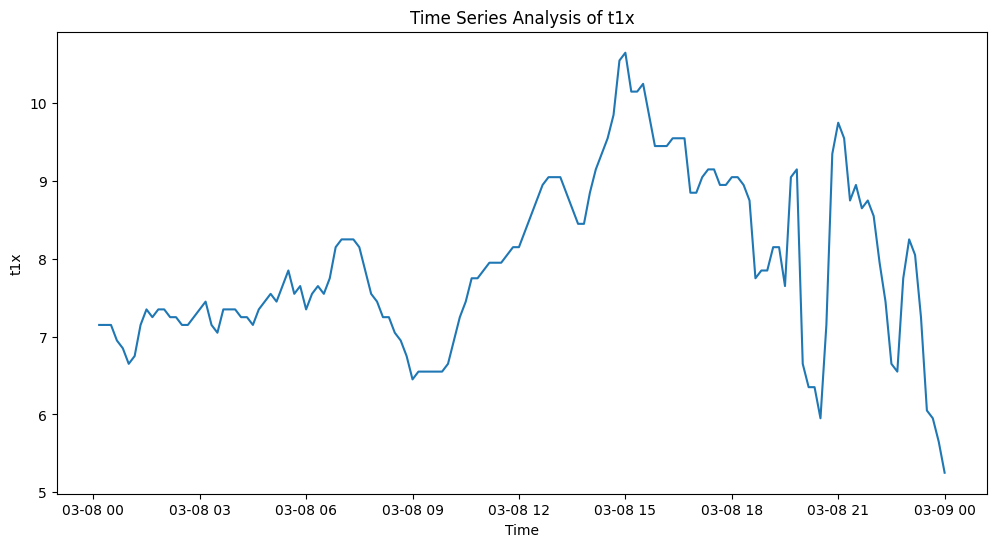

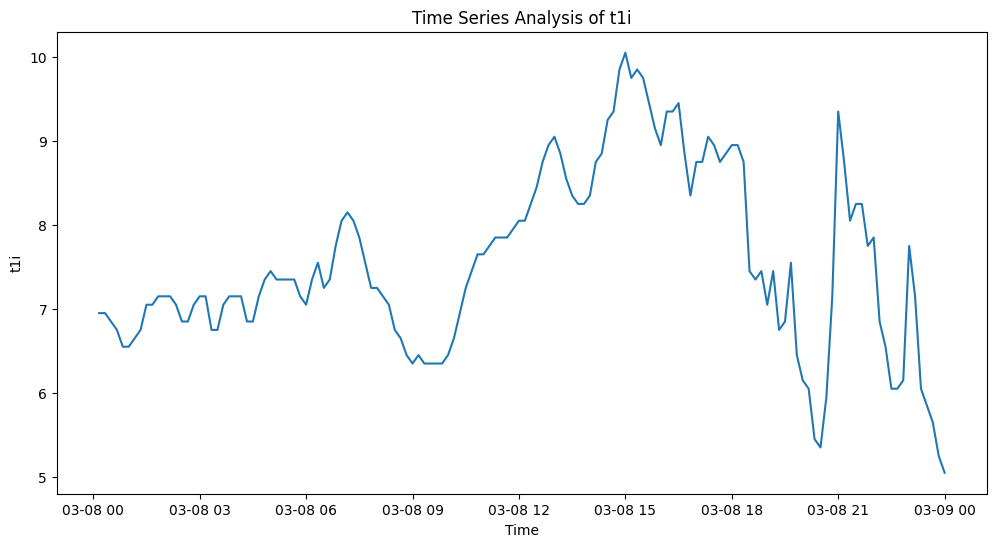

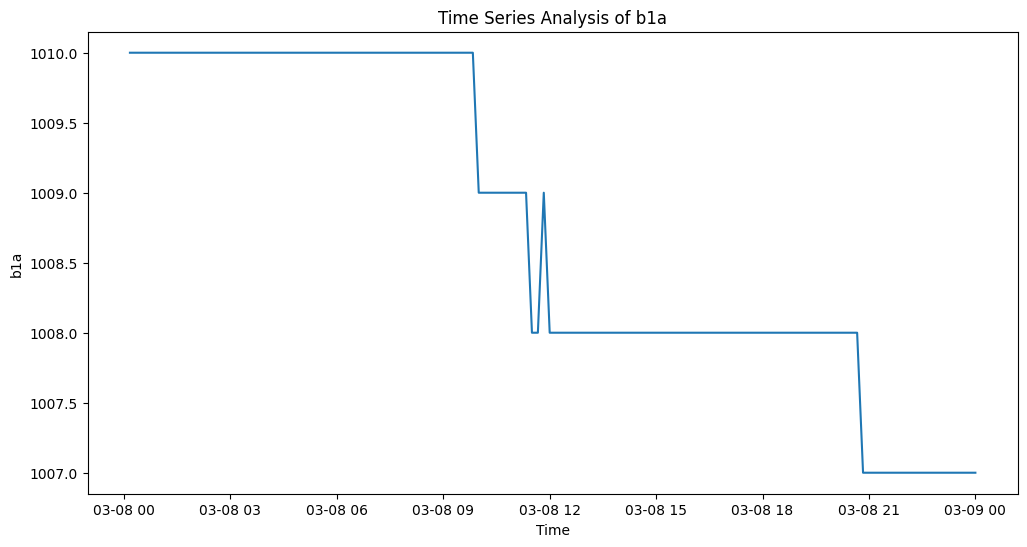

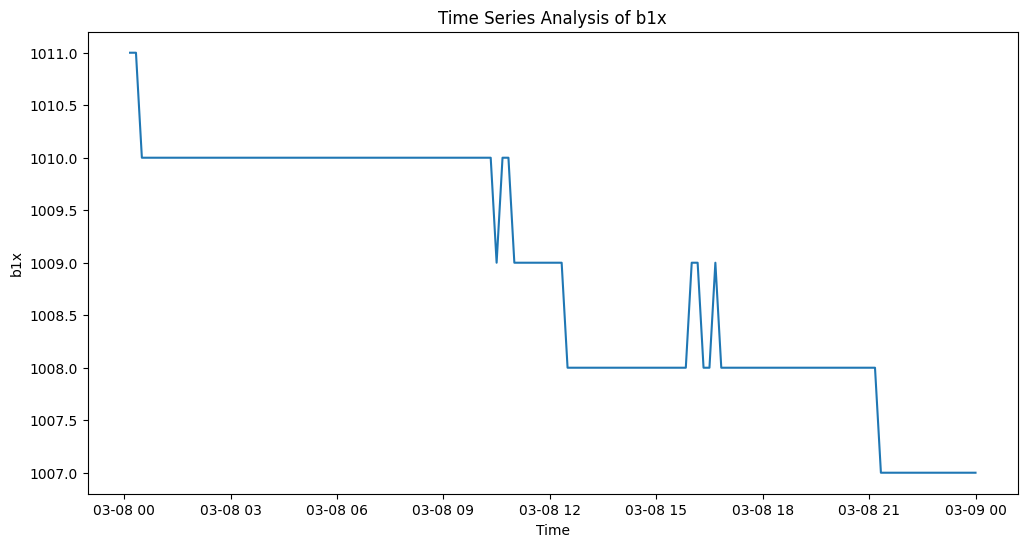

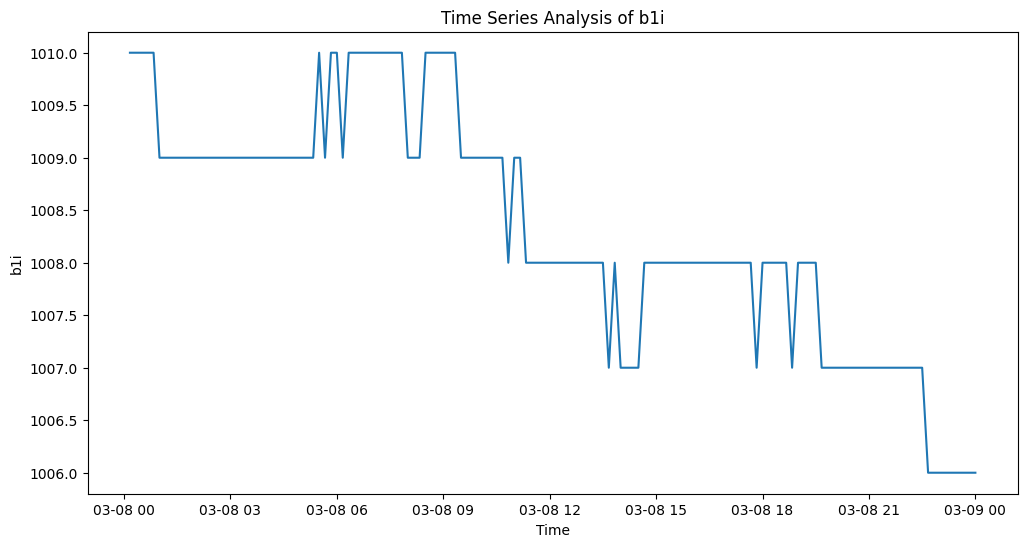

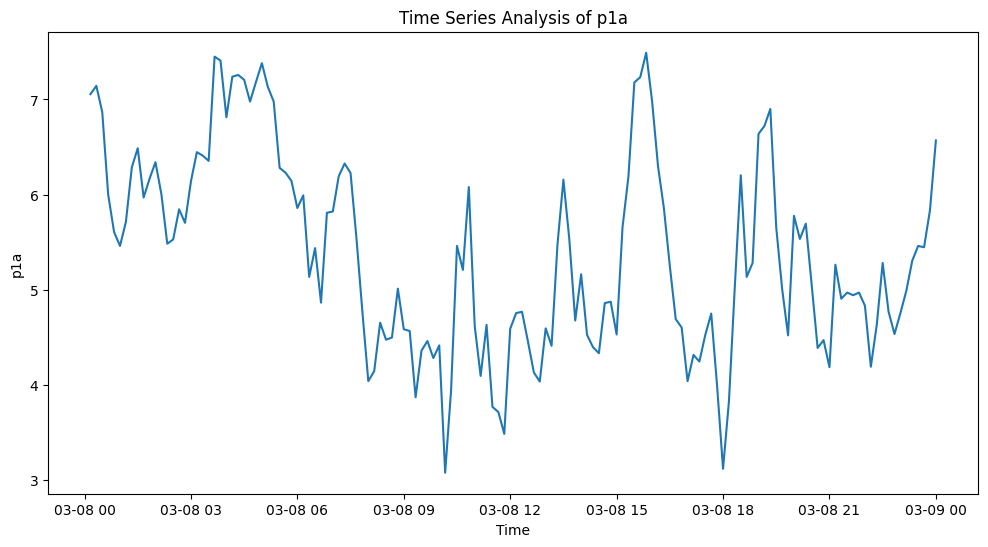

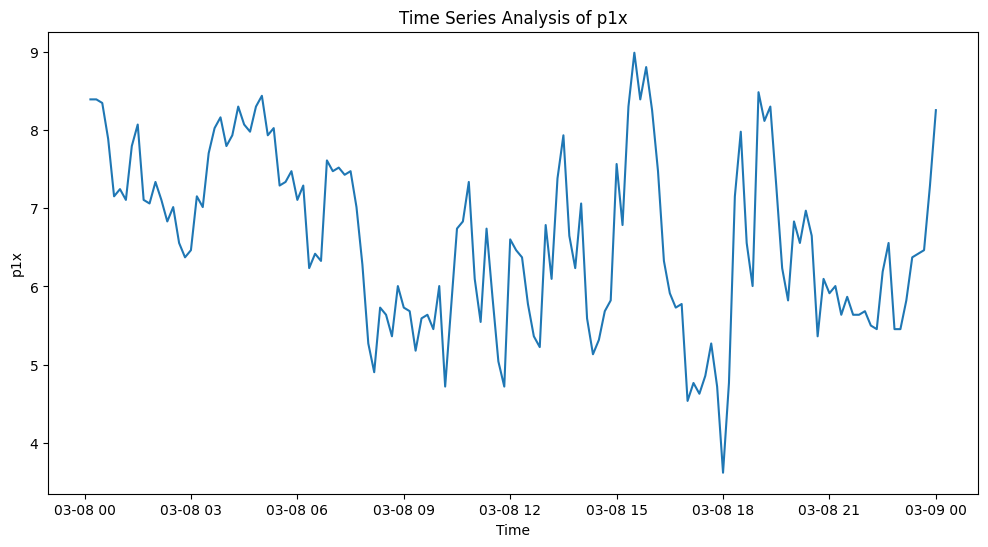

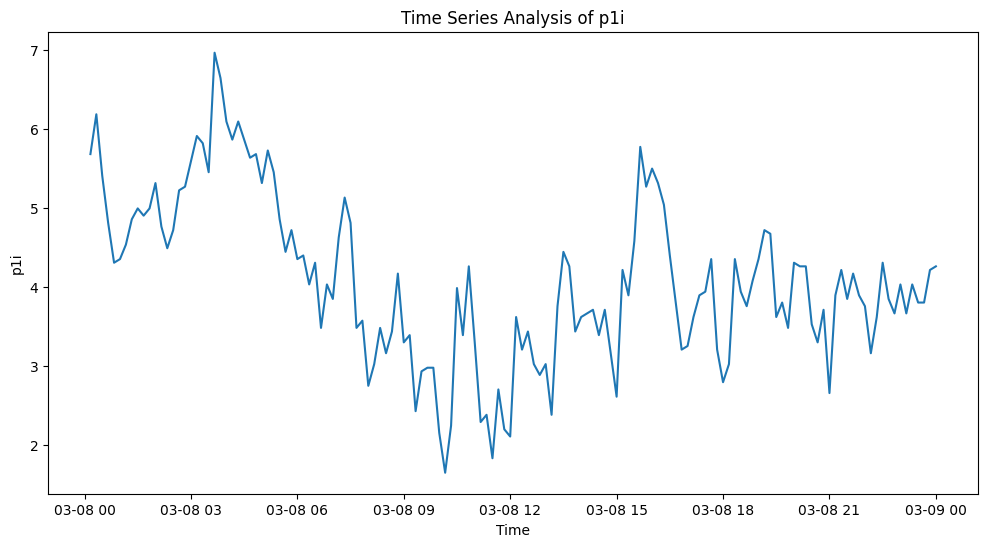

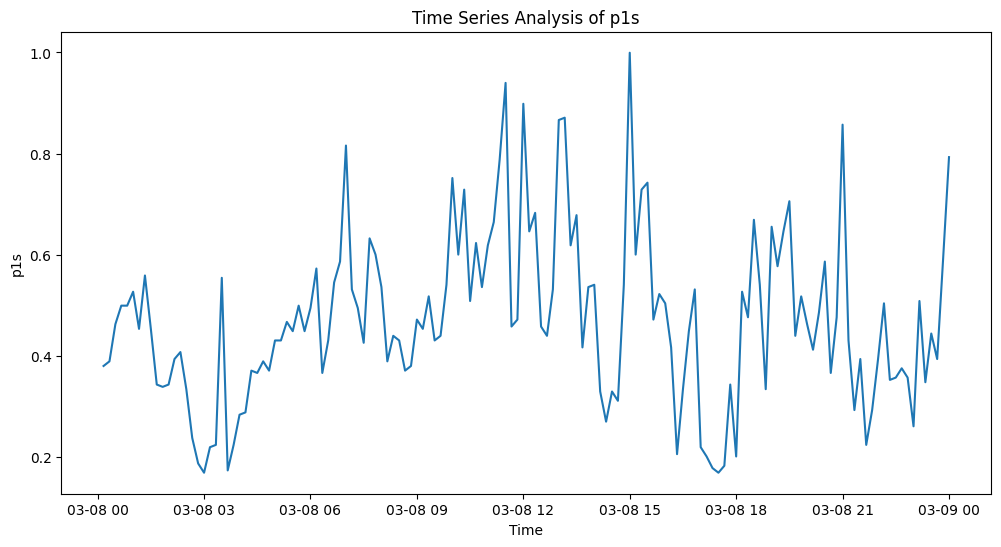

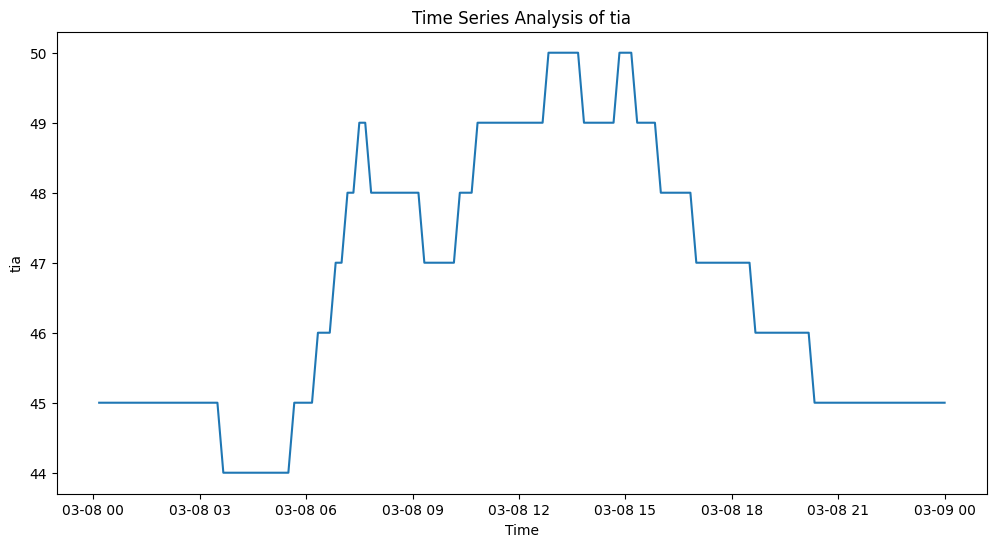

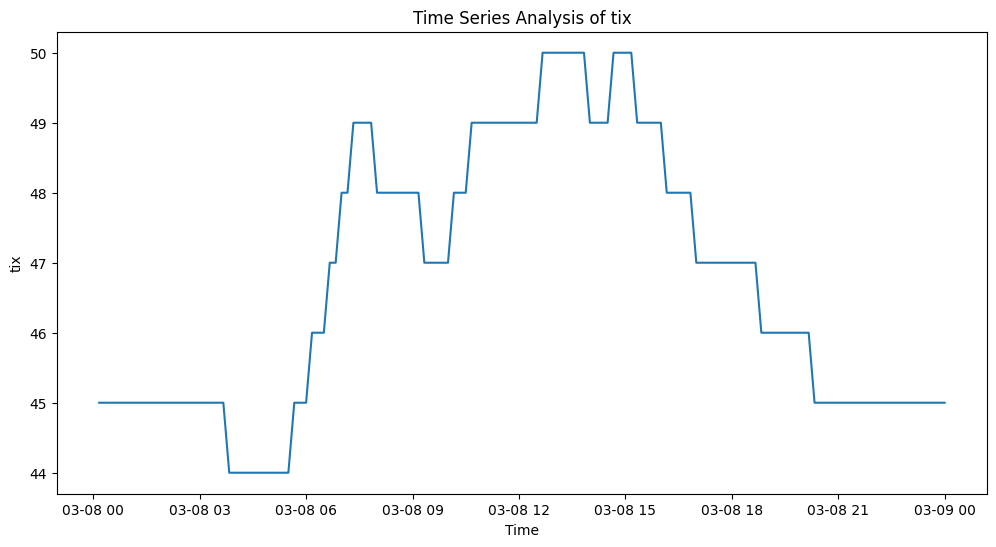

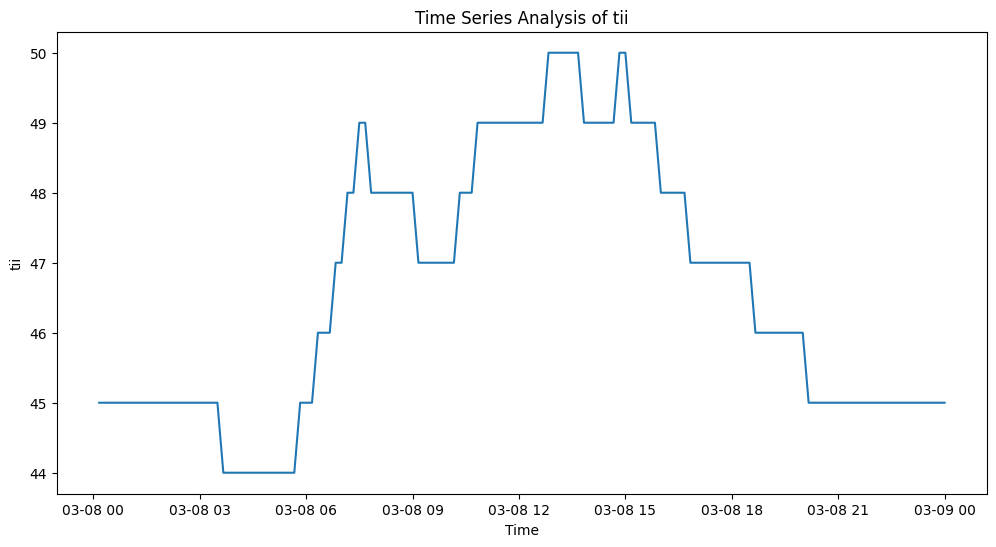

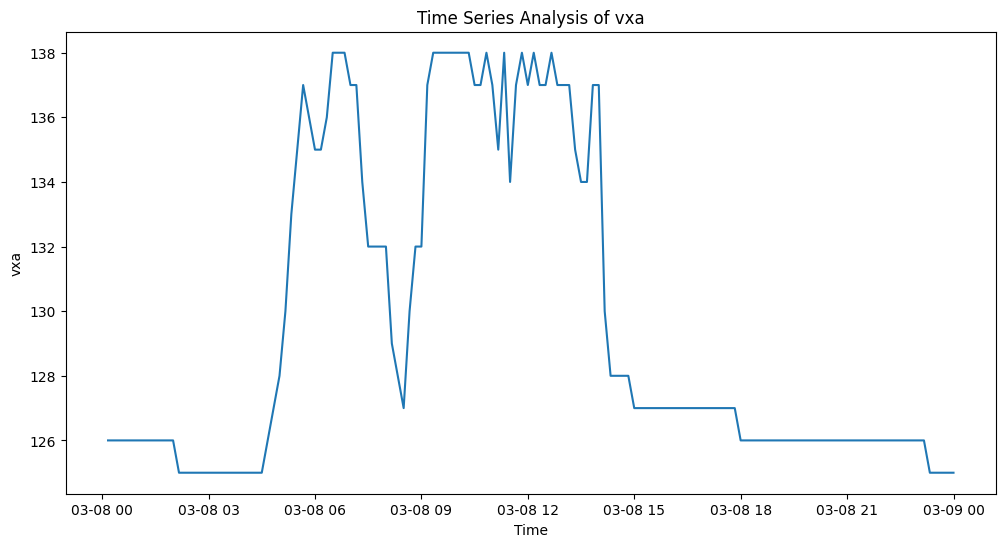

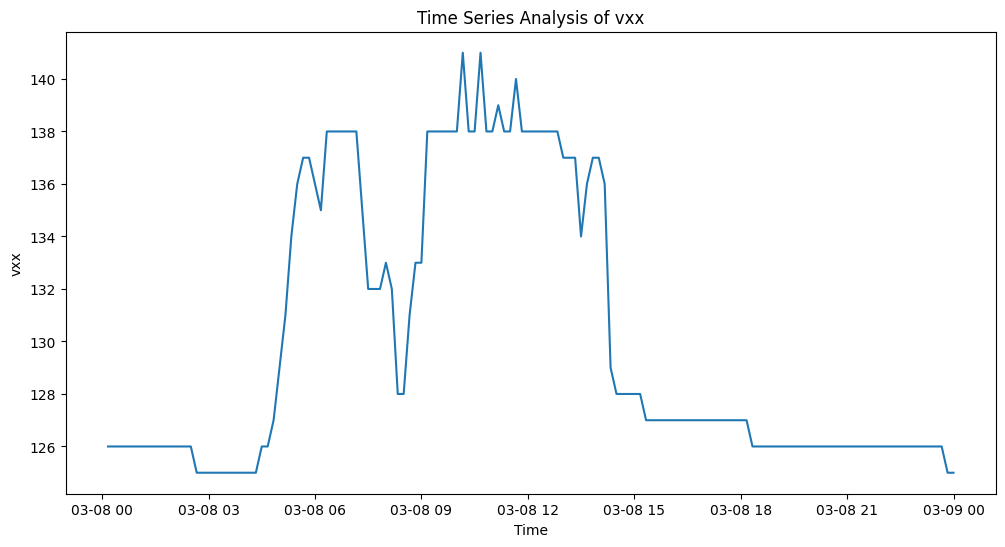

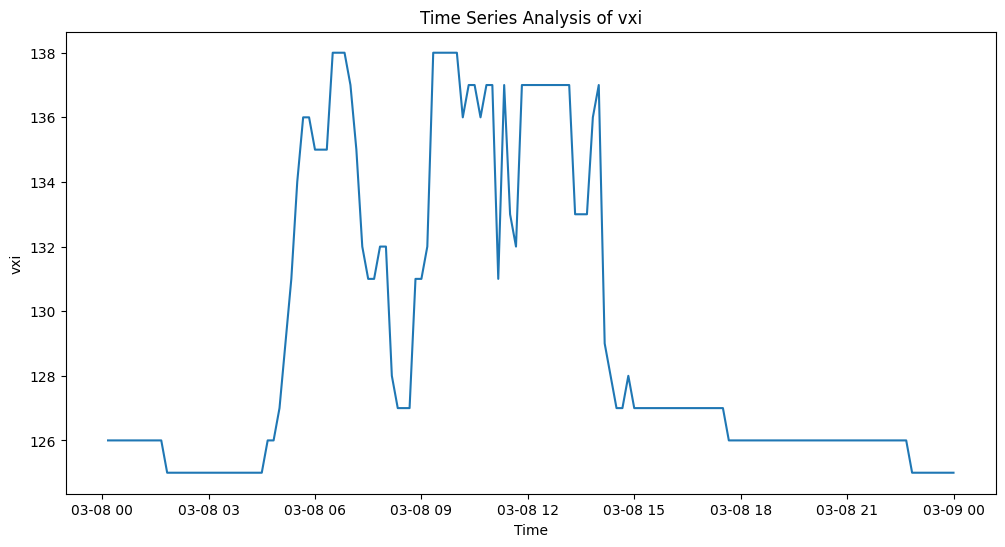

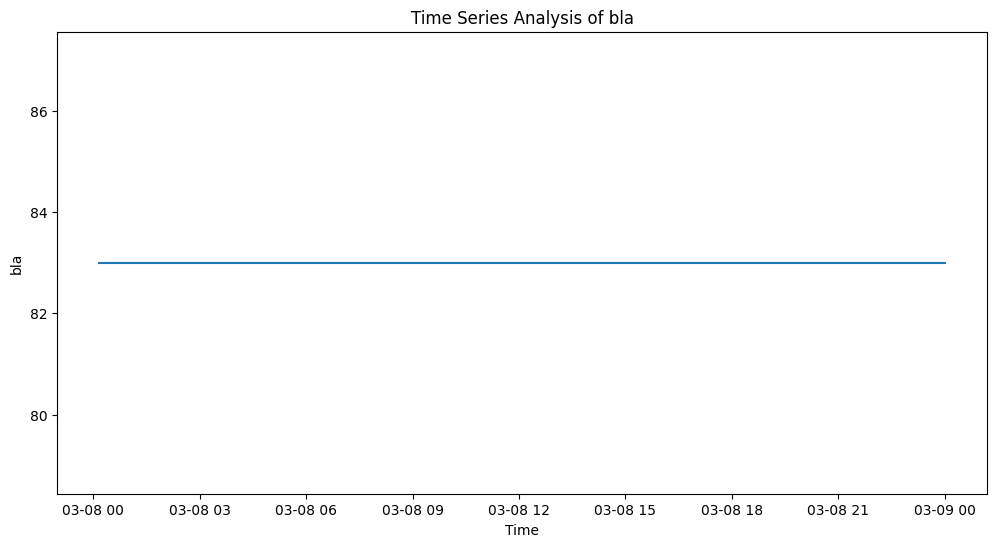

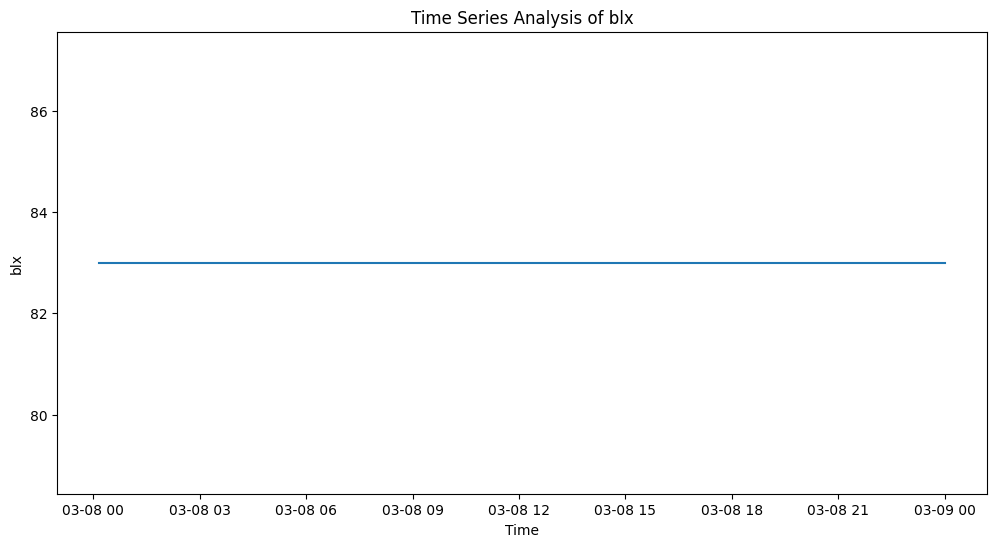

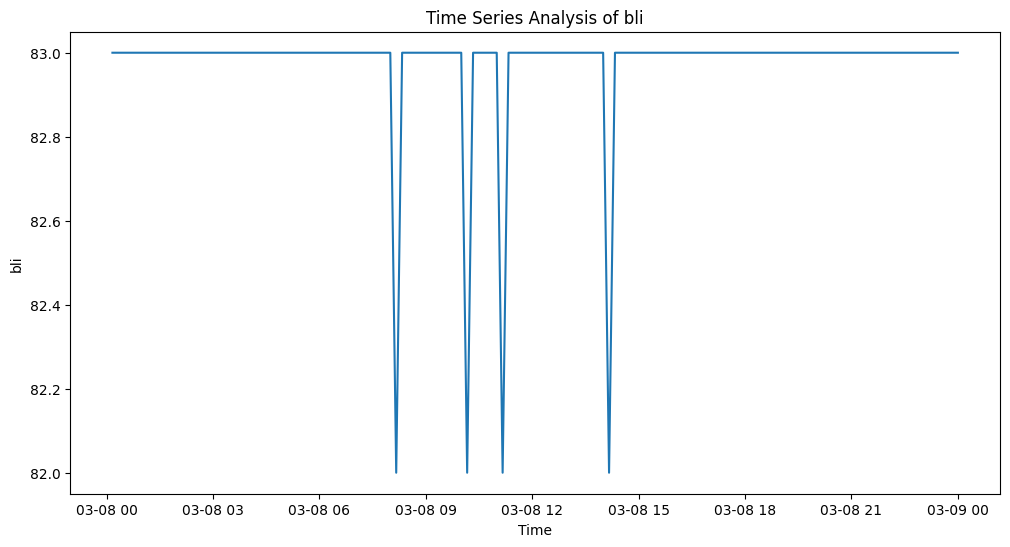

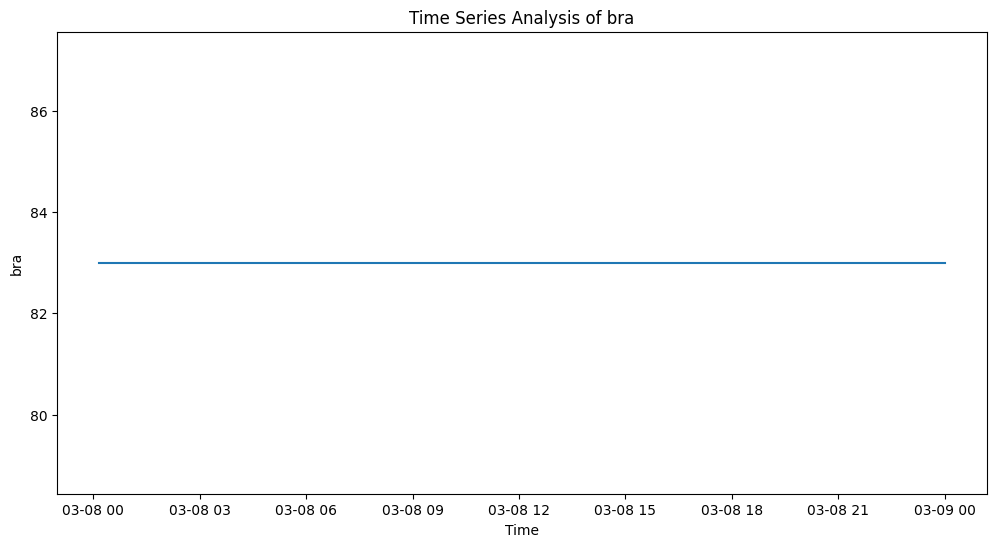

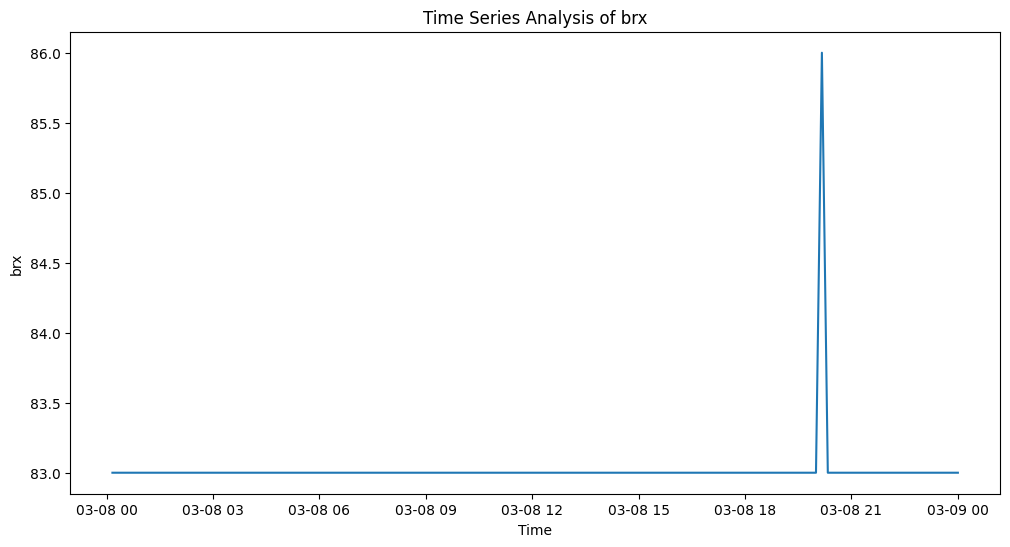

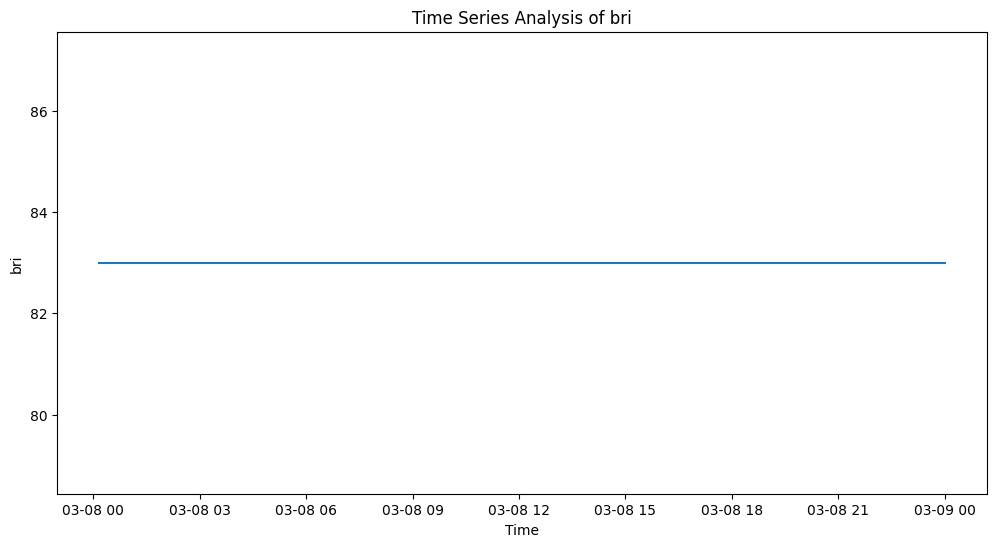

In [6]:
# Perform time series analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        plt.figure(figsize=(12, 6))
        sns.lineplot(x=df.index, y=df[column])
        plt.title(f'Time Series Analysis of {column}')
        plt.xlabel('Time')
        plt.ylabel(column)
        plt.show()

In [7]:
# Exclude columns from correlation analysis
columns_to_exclude = ['datetime', 'date', 'time', 'period']
columns_for_correlation = [col for col in df.columns if col not in columns_to_exclude]

# Calculate correlation matrix
correlation_matrix = df[columns_for_correlation].corr()
#print(correlation_matrix)

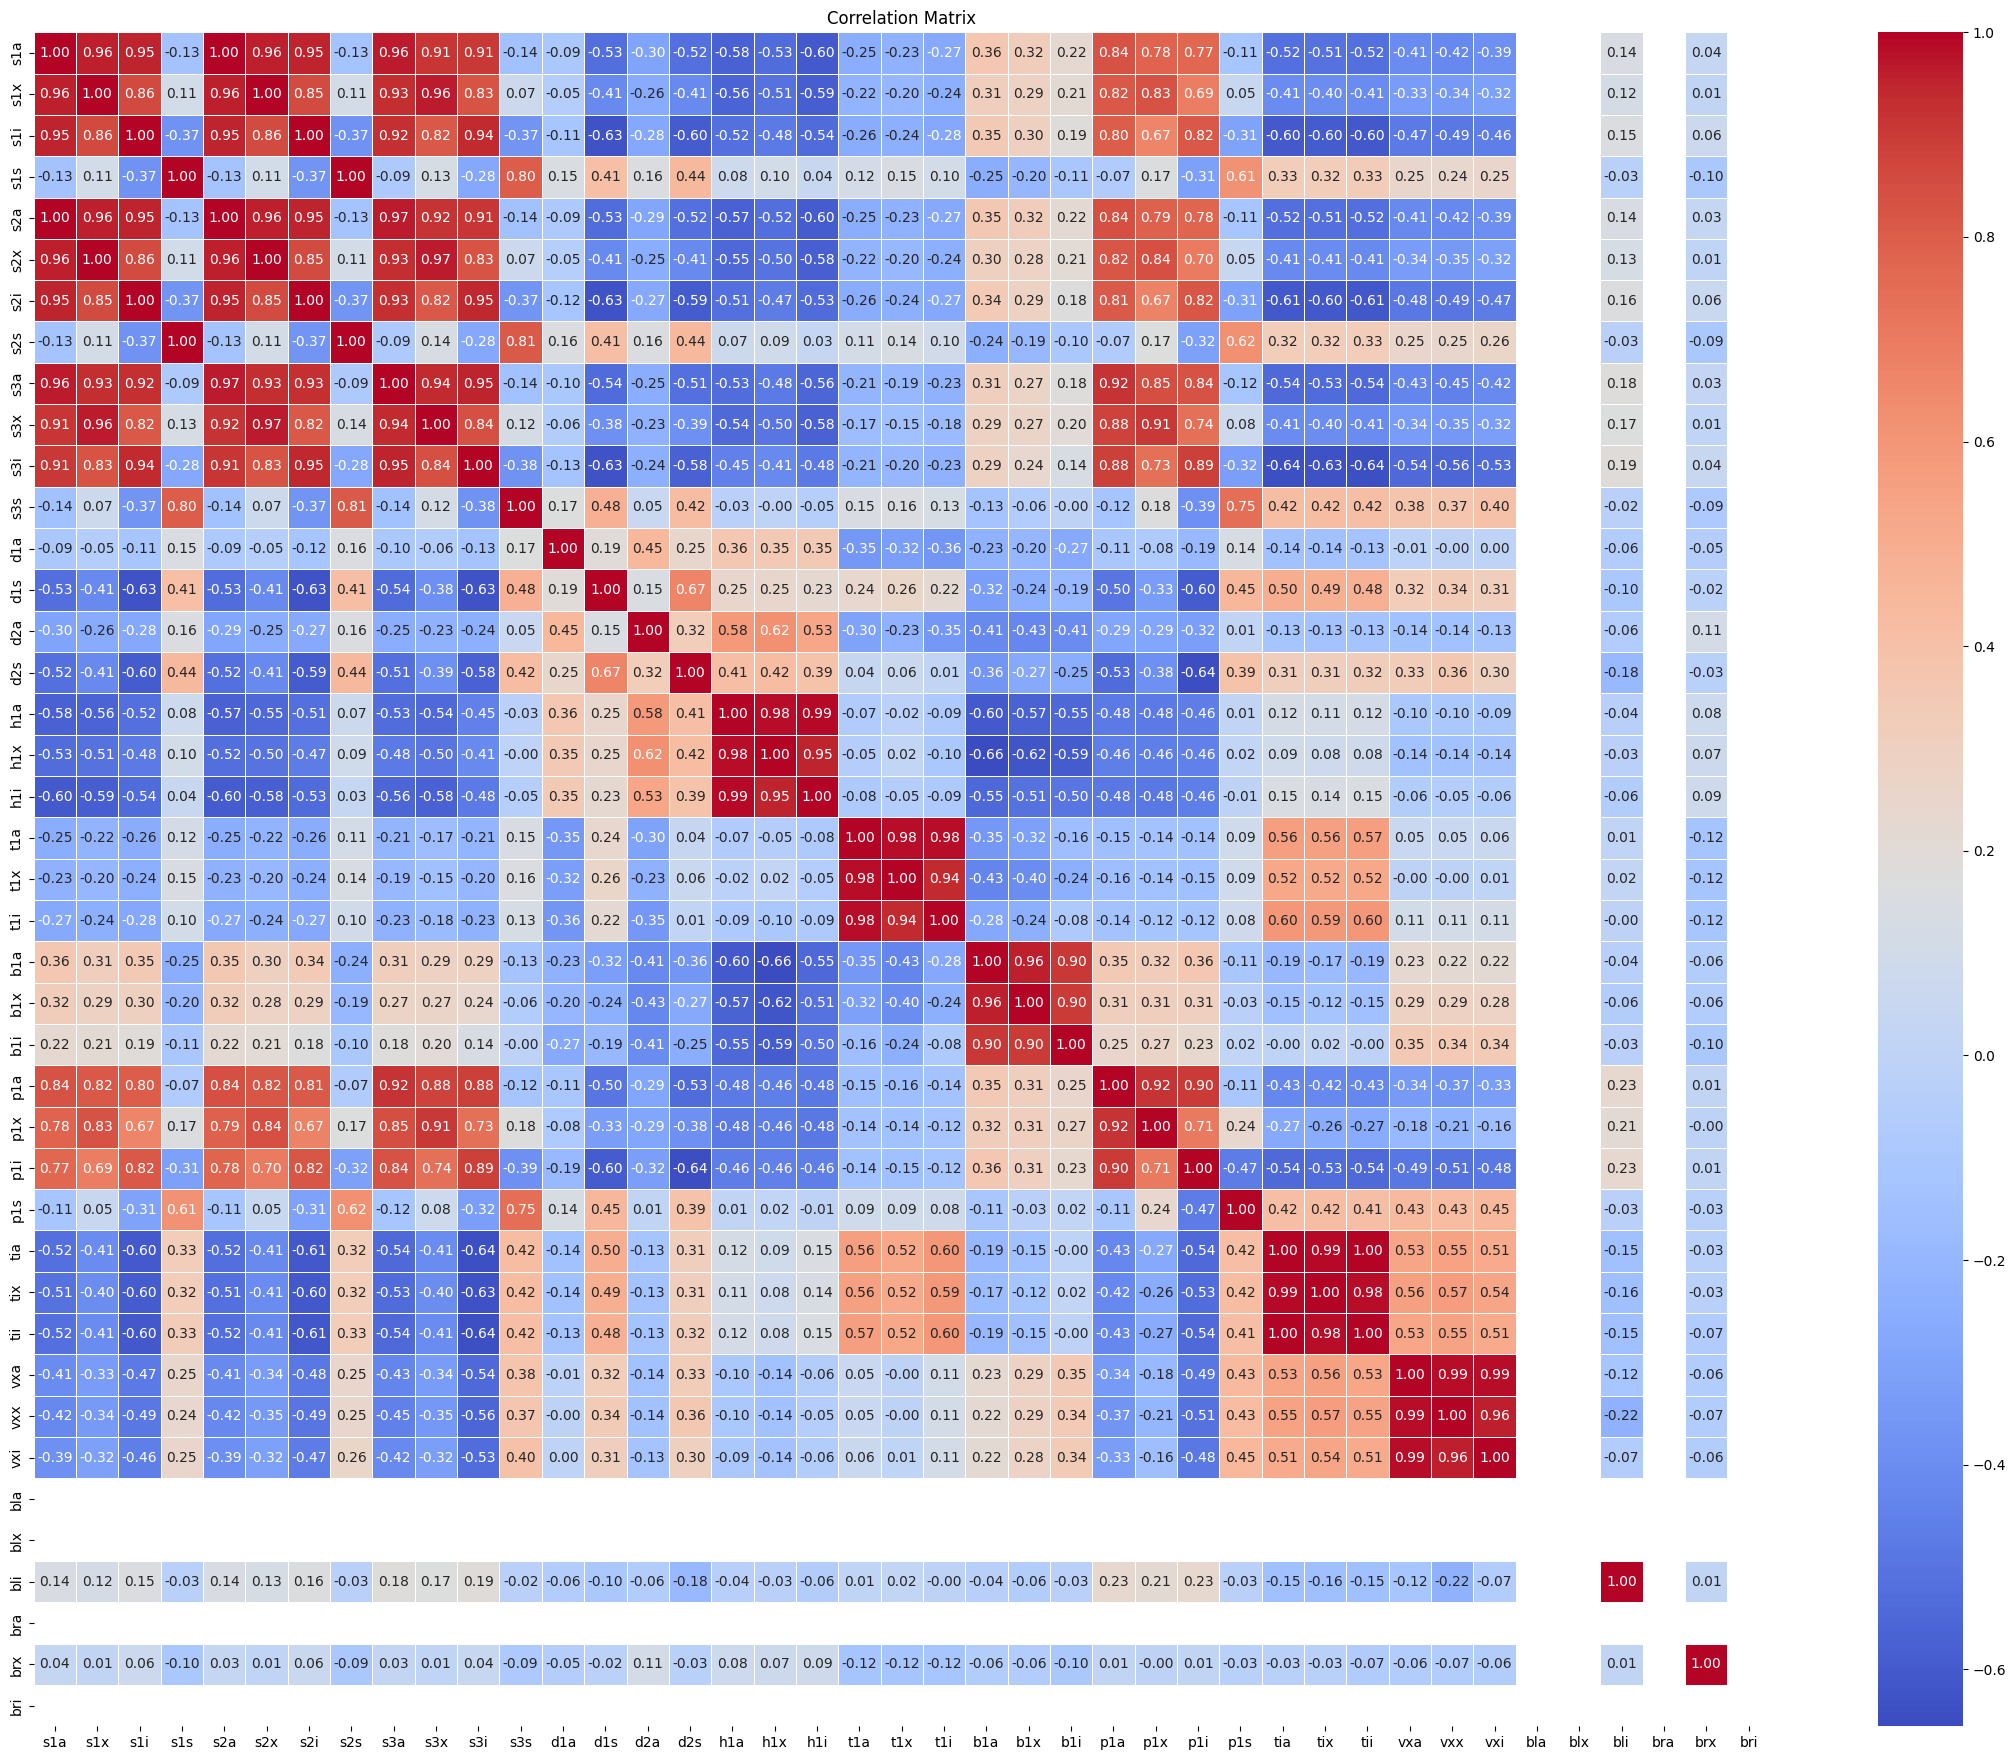

In [8]:
# Create a heatmap for the correlation matrix
#  The heatmap displays the correlation coefficients between different columns. 
# Positive values indicate a positive correlation, while negative values indicate a negative correlation. 
# Values closer to 1 or -1 indicate stronger correlations.
plt.figure(figsize=(28, 22))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

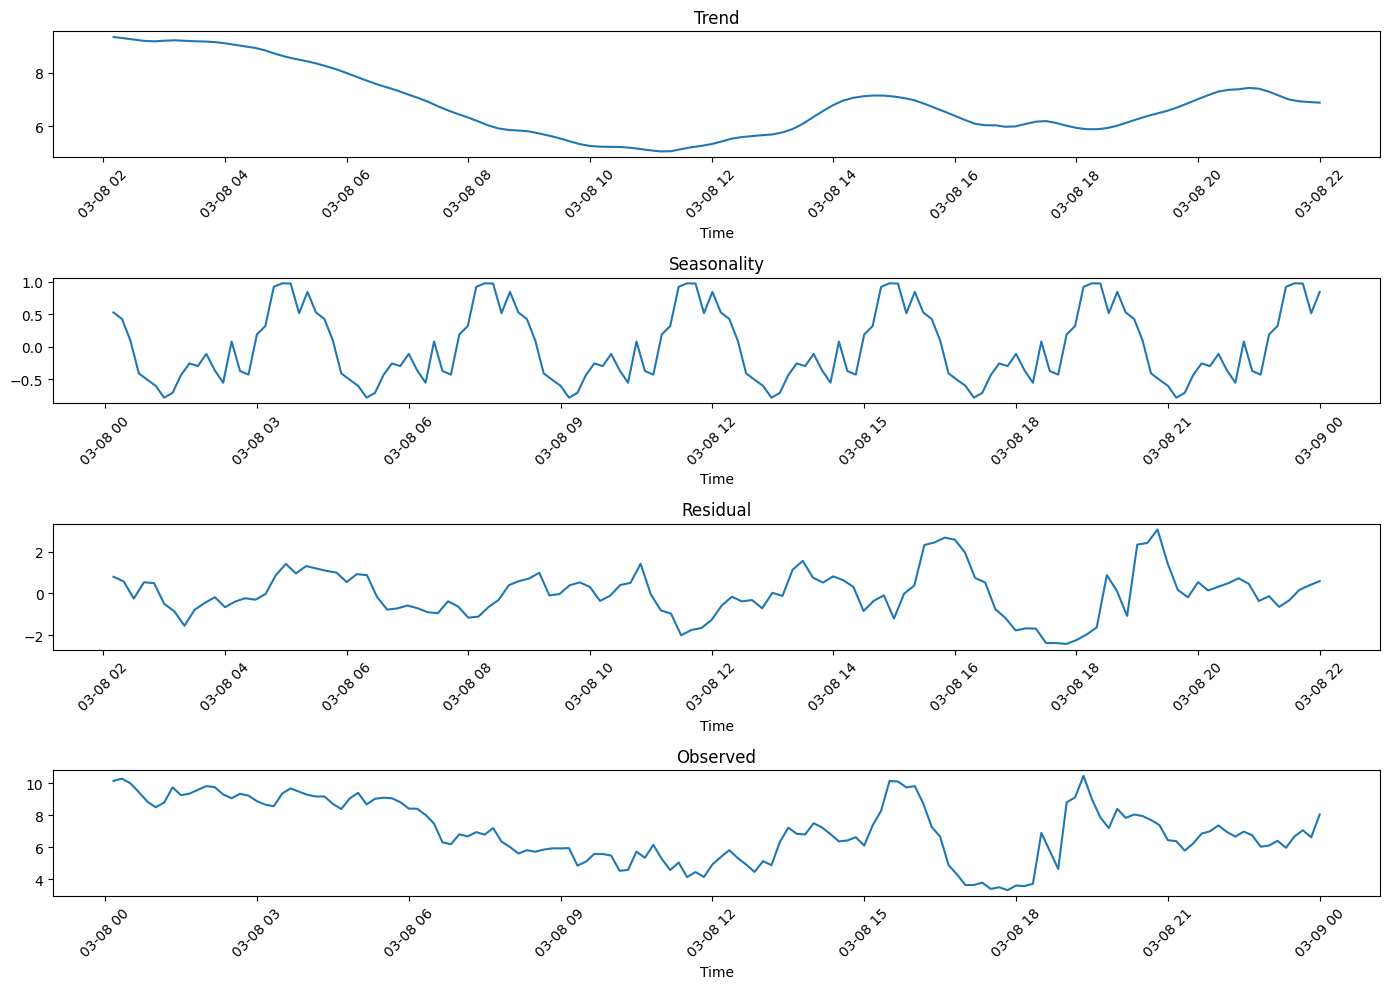

In [9]:
# Decompose the time series into trend, seasonality, and residual components
result = seasonal_decompose(df['s1a'], model='additive', period=24)  # Assuming seasonality is daily (24 hours)

# Increase figure size
plt.figure(figsize=(14, 10))

# Plot decomposed components
plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonality')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residual')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 4)
plt.plot(result.observed)
plt.title('Observed')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA para

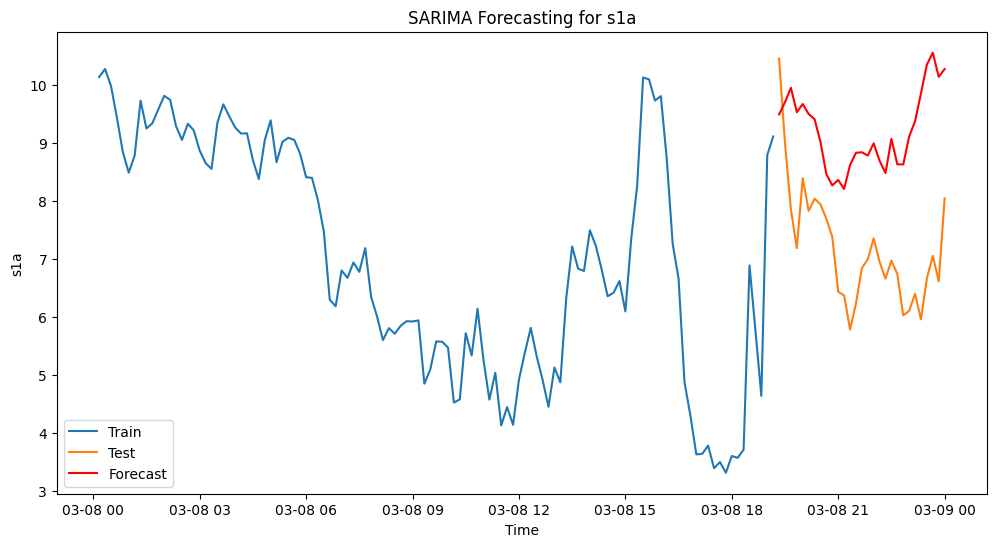

In [10]:
# Forecasting using SARIMA (Seasonal AutoRegressive Integrated Moving Average)
# Train-test split
train_size = int(len(df['s1a']) * 0.8)
train, test = df['s1a'][:train_size], df['s1a'][train_size:]

# Model fitting
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))  # Adjust order and seasonal_order as needed
fit_model = model.fit(disp=False)

# Forecast
forecast = fit_model.get_forecast(steps=len(test))
predicted_values = forecast.predicted_mean

# Visualize
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predicted_values, label='Forecast', color='red')
plt.title('SARIMA Forecasting for s1a')
plt.xlabel('Time')
plt.ylabel('s1a')
plt.legend()
plt.show()